#### Your task:
Find a good machine learning model to predict the target value. Then predict the target values of the instances in the test.csv. 


In [1]:
#Importing Setups
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
import warnings
warnings.filterwarnings('ignore')
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Preprocessing ``train.csv``

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head(4)

,$1000 Damage to Any One Person's Property,Bridge Detail,Construction Zone Flag,Construction Zone Workers Present Flag,Crash Time,Day of Week,Highway System,Intersecting Highway Number,Intersecting Street Name,Manner of Collision,Median Type,Median Width,Number of Entering Roads,Number of Lanes,Surface Condition,Surface Type,Surface Width,Weather Condition,Crash Severity
0,Yes,NOT APPLICABLE,No,No,638,TUESDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR,Not serious
1,Yes,NOT APPLICABLE,No,No,1658,SUNDAY,STATE SPUR,No Data,N FIELD ST,ANGLE - BOTH GOING STRAIGHT,No Data,40,97 - NOT APPLICABLE,8,2 - WET,No Data,96,3 - RAIN,Not serious
2,Yes,NOT APPLICABLE,No,No,1715,WEDNESDAY,STATE SPUR,No Data,AKARD ST,SAME DIRECTION - ONE STRAIGHT-ONE LEFT TURN,No Data,No Data,97 - NOT APPLICABLE,No Data,1 - DRY,No Data,No Data,2 - CLOUDY,Not serious
3,Yes,NOT APPLICABLE,No,No,1817,FRIDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-REAR END,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR,Not serious
4,Yes,NOT APPLICABLE,No,No,1950,SUNDAY,STATE SPUR,345,IH0345,ANGLE - BOTH GOING STRAIGHT,No Data,40,4 - FOUR ENTERING ROADS,8,1 - DRY,No Data,96,1 - CLEAR,Not serious


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   $1000 Damage to Any One Person's Property  2322 non-null   object
 1   Bridge Detail                              2322 non-null   object
 2   Construction Zone Flag                     2322 non-null   object
 3   Construction Zone Workers Present Flag     2322 non-null   object
 4   Crash Time                                 2322 non-null   int64 
 5   Day of Week                                2322 non-null   object
 6   Highway System                             2322 non-null   object
 7   Intersecting Highway Number                2322 non-null   object
 8   Intersecting Street Name                   541 non-null    object
 9   Manner of Collision                        2322 non-null   object
 10  Median Type                         

In [4]:
df_train.isnull().sum()

$1000 Damage to Any One Person's Property       0
Bridge Detail                                   0
Construction Zone Flag                          0
Construction Zone Workers Present Flag          0
Crash Time                                      0
Day of Week                                     0
Highway System                                  0
Intersecting Highway Number                     0
Intersecting Street Name                     1781
Manner of Collision                             0
Median Type                                     0
Median Width                                    0
Number of Entering Roads                        0
Number of Lanes                                 0
Surface Condition                               0
Surface Type                                    0
Surface Width                                   0
Weather Condition                               0
Crash Severity                                  0
dtype: int64

**2) Data PreProcessing**

1) $1000 Damage to Any One Person's Property

In [4]:
df_train['$1000 Damage to Any One Person\'s Property'].value_counts()

Yes    2167
No      155
Name: $1000 Damage to Any One Person's Property, dtype: int64

We will map the column with Yes as 1 and No as 0

In [5]:
df_train['$1000 Damage to Any One Person\'s Property'] = df_train['$1000 Damage to Any One Person\'s Property'].map({'Yes':1, 'No':0}).astype(int)

In [6]:
df_train['$1000 Damage to Any One Person\'s Property'].value_counts()

1    2167
0     155
Name: $1000 Damage to Any One Person's Property, dtype: int64

2) Bridge Detail

In [7]:
df_train['Bridge Detail'].value_counts()

NOT APPLICABLE                            2296
STRUCTURE NOT HIT                           11
VEHICLE RETAINED ON BRIDGE OR OVERPASS       8
CRASH INVOLVED UNDERPASS                     6
VEHICLE WENT OVER RAIL                       1
Name: Bridge Detail, dtype: int64

The value "Not Applicable" has the highest count followed by others which have comparatively low count and thus we will replace all the other values with "Applicable"

In [8]:
df_train.replace({'Bridge Detail': {'STRUCTURE NOT HIT': 'APPLICABLE',
                                    'VEHICLE RETAINED ON BRIDGE OR OVERPASS': 'APPLICABLE',
                                    'CRASH INVOLVED UNDERPASS': 'APPLICABLE',
                                    'VEHICLE WENT OVER RAIL': 'APPLICABLE'}}, inplace=True)

In [9]:
df_train['Bridge Detail'].value_counts()

NOT APPLICABLE    2296
APPLICABLE          26
Name: Bridge Detail, dtype: int64

We will map the column with NOT APPLICABLE as 1 and APPLICABLE as 0

In [10]:
df_train['Bridge Detail'] = df_train['Bridge Detail'].map({'NOT APPLICABLE':1, 'APPLICABLE':0}).astype(int)

In [11]:
df_train['Bridge Detail'].value_counts()

1    2296
0      26
Name: Bridge Detail, dtype: int64

3) Construction Zone Flag 

In [12]:
df_train['Construction Zone Flag'].value_counts()

No     2191
Yes     131
Name: Construction Zone Flag, dtype: int64

We will map the column with No as 1 and Yes as 0

In [13]:
df_train['Construction Zone Flag'] = df_train['Construction Zone Flag'].map({'No':1, 'Yes':0}).astype(int)

In [14]:
df_train['Construction Zone Flag'].value_counts()

1    2191
0     131
Name: Construction Zone Flag, dtype: int64

4) Construction Zone Workers Present Flag 

In [15]:
df_train['Construction Zone Workers Present Flag'].value_counts()

No     2279
Yes      43
Name: Construction Zone Workers Present Flag, dtype: int64

We will map the column with No as 1 and Yes as 0

In [16]:
df_train['Construction Zone Workers Present Flag'] = df_train['Construction Zone Workers Present Flag'].map({'No':1, 'Yes':0}).astype(int)

In [17]:
df_train['Construction Zone Workers Present Flag'].value_counts()

1    2279
0      43
Name: Construction Zone Workers Present Flag, dtype: int64

5) Crash Time

In [18]:
df_train['Crash Time'].value_counts()

1830    21
1600    19
1800    18
1900    14
1640    14
        ..
1504     1
1344     1
527      1
811      1
319      1
Name: Crash Time, Length: 799, dtype: int64

Since crash time is already an integer value we dont need to convert it.

6) Day of Week

In [19]:
df_train['Day of Week'].value_counts()

FRIDAY       392
SATURDAY     360
TUESDAY      346
WEDNESDAY    328
THURSDAY     314
MONDAY       297
SUNDAY       285
Name: Day of Week, dtype: int64

Day of Week is not an ordinal value since there is no order/rank and also there are 7 unique values for this attribute, we will transform this into one hot vector of length 7

In [20]:
cols = pd.get_dummies(df_train['Day of Week'], prefix= 'Day of Week')
df_train[cols.columns] = cols
df_train.drop('Day of Week', axis = 1, inplace = True)

7) Highway System

In [21]:
df_train['Highway System'].value_counts()

STATE SPUR    2322
Name: Highway System, dtype: int64

Since it has only one value we will drop this column

In [22]:
df_train.drop('Highway System', axis = 1, inplace = True)

8) Intersecting Highway Number

In [23]:
df_train['Intersecting Highway Number'].value_counts()

No Data    1948
35          221
345         146
75            7
Name: Intersecting Highway Number, dtype: int64

In [24]:
#df_train.drop('Intersecting Highway Number', axis = 1, inplace = True)

In [25]:
cols = pd.get_dummies(df_train['Intersecting Highway Number'], prefix= 'Intersecting Highway Number')
df_train[cols.columns] = cols
df_train.drop('Intersecting Highway Number', axis = 1, inplace = True)

9) Intersecting Street Name

In [26]:
df_train['Intersecting Street Name'].value_counts()

IH0035E                   221
IH0345                    146
N PEARL ST                 21
N FIELD ST                 18
OLIVE ST                   14
AKARD ST                   14
N AKARD ST                 14
ROUTH ST                   13
N ST PAUL ST               11
FIELD ST                   11
PEARL ST                    8
US0075                      7
MAPLE ROUTH CONNECTION      5
ROSS AVE                    4
N OLIVE ST                  4
N RIVERFRONT BLVD           3
NOT REPORTED                3
BOLL ST                     2
HARWOOD ST                  2
N BECKLEY AVE               2
ST PAUL ST                  2
N HARWOOD ST                1
N PEARL                     1
SAN JACINTO ST              1
COLUMBUS ST                 1
BECKLEY AVE                 1
LEMMON AVE                  1
STPAUL ST                   1
N AKARO ST                  1
ROUTH AVE                   1
MAPLE ROUTH                 1
SAINT PAUL ST               1
MAPLE ROUTH ST              1
LIVE OAK S

We will drop this column

In [27]:
df_train.drop('Intersecting Street Name', axis = 1, inplace = True)

10) Manner of Collision 

In [28]:
df_train['Manner of Collision'].value_counts()

SAME DIRECTION - BOTH GOING STRAIGHT-REAR END        665
SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE       542
SAME DIRECTION - ONE STRAIGHT-ONE STOPPED            404
ONE MOTOR VEHICLE - GOING STRAIGHT                   325
ANGLE - BOTH GOING STRAIGHT                          177
OPPOSITE DIRECTION - ONE STRAIGHT-ONE LEFT TURN       89
SAME DIRECTION - ONE STRAIGHT-ONE LEFT TURN           32
ANGLE - ONE STRAIGHT-ONE RIGHT TURN                   16
SAME DIRECTION - ONE STRAIGHT-ONE RIGHT TURN          12
OPPOSITE DIRECTION - ONE STRAIGHT-ONE BACKING          9
SAME DIRECTION - BOTH RIGHT TURN                       9
ONE MOTOR VEHICLE - TURNING RIGHT                      9
ANGLE - ONE STRAIGHT-ONE LEFT TURN                     8
ONE MOTOR VEHICLE - TURNING LEFT                       7
OPPOSITE DIRECTION - ONE BACKING-ONE STOPPED           7
ONE MOTOR VEHICLE - OTHER                              2
ANGLE - ONE STRAIGHT-ONE STOPPED                       2
SAME DIRECTION - BOTH LEFT TURN

For this column we will merge the values into 4 major categories- Same direction, Opposite direction, Angle and One motor vehicle

In [29]:
df_train.replace({'Manner of Collision': {'SAME DIRECTION - BOTH GOING STRAIGHT-REAR END': 'SAME DIRECTION',
                                    'SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE': 'SAME DIRECTION',
                                    'SAME DIRECTION - ONE STRAIGHT-ONE STOPPED': 'SAME DIRECTION',
                                    'SAME DIRECTION - ONE STRAIGHT-ONE LEFT TURN': 'SAME DIRECTION',
                                    'SAME DIRECTION - ONE STRAIGHT-ONE RIGHT TURN': 'SAME DIRECTION',
                                    'SAME DIRECTION - BOTH RIGHT TURN': 'SAME DIRECTION',
                                    'SAME DIRECTION - BOTH LEFT TURN':'SAME DIRECTION'}}, inplace=True)

In [30]:
df_train.replace({'Manner of Collision': {'ONE MOTOR VEHICLE': 'ONE MOTOR VEHICLE',
                                    'ONE MOTOR VEHICLE - TURNING RIGHT': 'ONE MOTOR VEHICLE',
                                    'ONE MOTOR VEHICLE - TURNING LEFT': 'ONE MOTOR VEHICLE',
                                    'ONE MOTOR VEHICLE - OTHER': 'ONE MOTOR VEHICLE',
                                    'ONE MOTOR VEHICLE - BACKING': 'ONE MOTOR VEHICLE',
                                    'ONE MOTOR VEHICLE - GOING STRAIGHT':'ONE MOTOR VEHICLE'}}, inplace=True)

In [31]:
df_train.replace({'Manner of Collision': {'ANGLE - BOTH GOING STRAIGHT': 'ANGLE',
                                    'ANGLE - ONE STRAIGHT-ONE RIGHT TURN': 'ANGLE',
                                    'ANGLE - ONE STRAIGHT-ONE LEFT TURN': 'ANGLE',
                                    'ANGLE - ONE STRAIGHT-ONE STOPPED': 'ANGLE',
                                    'ANGLE - ONE STRAIGHT-ONE BACKING': 'ANGLE',
                                    'ANGLE - ONE RIGHT TURN-ONE STOPPED': 'ANGLE'}}, inplace=True)

In [32]:
df_train.replace({'Manner of Collision': {'OPPOSITE DIRECTION - ONE STRAIGHT-ONE LEFT TURN': 'OPPOSITE DIRECTION',
                                    'OPPOSITE DIRECTION - ONE STRAIGHT-ONE BACKING': 'OPPOSITE DIRECTION',
                                    'OPPOSITE DIRECTION - ONE BACKING-ONE STOPPED': 'OPPOSITE DIRECTION',
                                    'OPPOSITE DIRECTION - BOTH GOING STRAIGHT': 'OPPOSITE DIRECTION',
                                    'OPPOSITE DIRECTION - ONE RIGHT TURN-ONE LEFT TURN': 'OPPOSITE DIRECTION',
                                    'OPPOSITE DIRECTION - ONE LEFT TURN-ONE STOPPED': 'OPPOSITE DIRECTION'}}, inplace=True)

In [33]:
df_train['Manner of Collision'].value_counts()

SAME DIRECTION        1665
ONE MOTOR VEHICLE      344
ANGLE                  205
OPPOSITE DIRECTION     108
Name: Manner of Collision, dtype: int64

Now we will convert these values in one hot vector of length of 4

In [34]:
cols = pd.get_dummies(df_train['Manner of Collision'], prefix= 'Manner of Collision')
df_train[cols.columns] = cols
df_train.drop('Manner of Collision', axis = 1, inplace = True)

11) Median Type

In [35]:
df_train['Median Type'].value_counts()

No Data        2262
UNPROTECTED      60
Name: Median Type, dtype: int64

In [36]:
#df_train.drop('Median Type', axis = 1, inplace = True)

In [37]:
df_train['Median Type'] = df_train['Median Type'].map({'No Data':1, 'UNPROTECTED':0}).astype(int)

In [38]:
df_train['Median Type'].value_counts()

1    2262
0      60
Name: Median Type, dtype: int64

12) Median Width

In [39]:
df_train['Median Width'].value_counts()

40         1801
No Data     521
Name: Median Width, dtype: int64

In [40]:
#df_train.drop('Median Width', axis = 1, inplace = True)

In [41]:
df_train['Median Width'] = df_train['Median Width'].map({'40':1, 'No Data':0}).astype(int)

In [42]:
df_train['Median Width'].value_counts()

1    1801
0     521
Name: Median Width, dtype: int64

13) Number of Entering Roads

In [43]:
df_train['Number of Entering Roads'].value_counts()

97 - NOT APPLICABLE                  1980
4 - FOUR ENTERING ROADS               193
2 - THREE ENTERING ROADS - T           68
98 - OTHER (EXPLAIN IN NARRATIVE)      44
3 - THREE ENTERING ROADS - Y           31
5 - FIVE ENTERING ROADS                 2
6 - SIX ENTERING ROADS                  2
8 - CLOVERLEAF                          2
Name: Number of Entering Roads, dtype: int64

For this column we will merge the values of 8 - CLOVERLEAF, 5 - FIVE ENTERING ROADS, 6 - SIX ENTERING ROADS and 98 - OTHER (EXPLAIN IN NARRATIVE) as OTHER

In [44]:
df_train.replace({'Number of Entering Roads': {'98 - OTHER (EXPLAIN IN NARRATIVE)': 'OTHER',
                                    '6 - SIX ENTERING ROADS': 'OTHER',
                                    '5 - FIVE ENTERING ROADS': 'OTHER',
                                    '8 - CLOVERLEAF': 'OTHER'}}, inplace=True)

In [45]:
df_train['Number of Entering Roads'].value_counts()

97 - NOT APPLICABLE             1980
4 - FOUR ENTERING ROADS          193
2 - THREE ENTERING ROADS - T      68
OTHER                             50
3 - THREE ENTERING ROADS - Y      31
Name: Number of Entering Roads, dtype: int64

In [46]:
cols = pd.get_dummies(df_train['Number of Entering Roads'], prefix= 'Number of Entering Roads')
df_train[cols.columns] = cols
df_train.drop('Number of Entering Roads', axis = 1, inplace = True)

14) Surface Condition

In [47]:
df_train['Surface Condition'].value_counts()

1 - DRY                              2051
2 - WET                               246
3 - STANDING WATER                     14
6 - ICE                                 5
99 - UNKNOWN                            3
98 - OTHER (EXPLAIN IN NARRATIVE)       2
7 - SAND, MUD, DIRT                     1
Name: Surface Condition, dtype: int64

For this column we will merge the values of 99 - UNKNOWN and 7 - SAND, MUD, DIRT as 98 - OTHER (EXPLAIN IN NARRATIVE)

In [48]:
df_train.replace({'Surface Condition': {'99 - UNKNOWN': '98 - OTHER (EXPLAIN IN NARRATIVE)',
                                    '7 - SAND, MUD, DIRT': '98 - OTHER (EXPLAIN IN NARRATIVE)'}}, inplace=True)

In [49]:
df_train['Surface Condition'].value_counts()

1 - DRY                              2051
2 - WET                               246
3 - STANDING WATER                     14
98 - OTHER (EXPLAIN IN NARRATIVE)       6
6 - ICE                                 5
Name: Surface Condition, dtype: int64

In [50]:
cols = pd.get_dummies(df_train['Surface Condition'], prefix= 'Surface Condition')
df_train[cols.columns] = cols
df_train.drop('Surface Condition', axis = 1, inplace = True)

15) Surface Type

In [51]:
df_train['Surface Type'].value_counts()

No Data    2322
Name: Surface Type, dtype: int64

Since there is just one unique value we will drop this column

In [52]:
df_train.drop('Surface Type', axis = 1, inplace = True)

15) Surface Width

In [53]:
df_train['Surface Width'].value_counts()

96         1257
72          544
No Data     521
Name: Surface Width, dtype: int64

In [54]:
#df_train.drop('Surface Width', axis = 1, inplace = True)

In [55]:
#df_train.replace({'Surface Width': {'No Data': '96'}}, inplace=True)

In [56]:
cols = pd.get_dummies(df_train['Surface Width'], prefix= 'Surface Width')
df_train[cols.columns] = cols
df_train.drop('Surface Width', axis = 1, inplace = True)

16) Weather Condition

In [57]:
df_train['Weather Condition'].value_counts()

1 - CLEAR                            1817
2 - CLOUDY                            319
3 - RAIN                              179
6 - FOG                                 2
98 - OTHER (EXPLAIN IN NARRATIVE)       2
4 - SLEET/HAIL                          1
5 - SNOW                                1
99 - UNKNOWN                            1
Name: Weather Condition, dtype: int64

In [58]:
df_train.replace({'Weather Condition': {'99 - UNKNOWN': '98 - OTHER (EXPLAIN IN NARRATIVE)',
                                 '5 - SNOW': '98 - OTHER (EXPLAIN IN NARRATIVE)',
                                 '4 - SLEET/HAIL': '98 - OTHER (EXPLAIN IN NARRATIVE)'}}, inplace = True)

In [59]:
df_train['Weather Condition'].value_counts()

1 - CLEAR                            1817
2 - CLOUDY                            319
3 - RAIN                              179
98 - OTHER (EXPLAIN IN NARRATIVE)       5
6 - FOG                                 2
Name: Weather Condition, dtype: int64

In [60]:
cols = pd.get_dummies(df_train['Weather Condition'], prefix= 'Weather Condition')
df_train[cols.columns] = cols
df_train.drop('Weather Condition', axis = 1, inplace = True)

17) Number of lanes

In [61]:
df_train['Number of Lanes'].value_counts()

8          1257
6           544
No Data     521
Name: Number of Lanes, dtype: int64

In [62]:
#df_train.drop('Number of Lanes', axis = 1, inplace = True)

In [63]:
#df_train.replace({'Number of Lanes': {'No Data': '8'}}, inplace=True)

In [64]:
cols = pd.get_dummies(df_train['Number of Lanes'], prefix= 'Number of Lanes')
df_train[cols.columns] = cols
df_train.drop('Number of Lanes', axis = 1, inplace = True)

18) Crash Severity

In [65]:
df_train['Crash Severity'].value_counts()

Not serious    2286
Serious          36
Name: Crash Severity, dtype: int64

We will map Not Serious as 1 and Serious as 0

In [66]:
df_train['Crash Severity'] = df_train['Crash Severity'].map({'Not serious':0, 'Serious':1}).astype(int)

In [67]:
df_train['Crash Severity'].value_counts()

0    2286
1      36
Name: Crash Severity, dtype: int64

In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 44 columns):
 #   Column                                                 Non-Null Count  Dtype
---  ------                                                 --------------  -----
 0   $1000 Damage to Any One Person's Property              2322 non-null   int64
 1   Bridge Detail                                          2322 non-null   int64
 2   Construction Zone Flag                                 2322 non-null   int64
 3   Construction Zone Workers Present Flag                 2322 non-null   int64
 4   Crash Time                                             2322 non-null   int64
 5   Median Type                                            2322 non-null   int64
 6   Median Width                                           2322 non-null   int64
 7   Crash Severity                                         2322 non-null   int64
 8   Day of Week_FRIDAY                                     2322 non-null

array([[<AxesSubplot:xlabel="$1000 Damage to Any One Person's Property", ylabel="$1000 Damage to Any One Person's Property">,
        <AxesSubplot:xlabel='Bridge Detail', ylabel="$1000 Damage to Any One Person's Property">,
        <AxesSubplot:xlabel='Construction Zone Flag', ylabel="$1000 Damage to Any One Person's Property">,
        <AxesSubplot:xlabel='Construction Zone Workers Present Flag', ylabel="$1000 Damage to Any One Person's Property">,
        <AxesSubplot:xlabel='Crash Time', ylabel="$1000 Damage to Any One Person's Property">,
        <AxesSubplot:xlabel='Median Type', ylabel="$1000 Damage to Any One Person's Property">],
       [<AxesSubplot:xlabel="$1000 Damage to Any One Person's Property", ylabel='Bridge Detail'>,
        <AxesSubplot:xlabel='Bridge Detail', ylabel='Bridge Detail'>,
        <AxesSubplot:xlabel='Construction Zone Flag', ylabel='Bridge Detail'>,
        <AxesSubplot:xlabel='Construction Zone Workers Present Flag', ylabel='Bridge Detail'>,
        <Axe

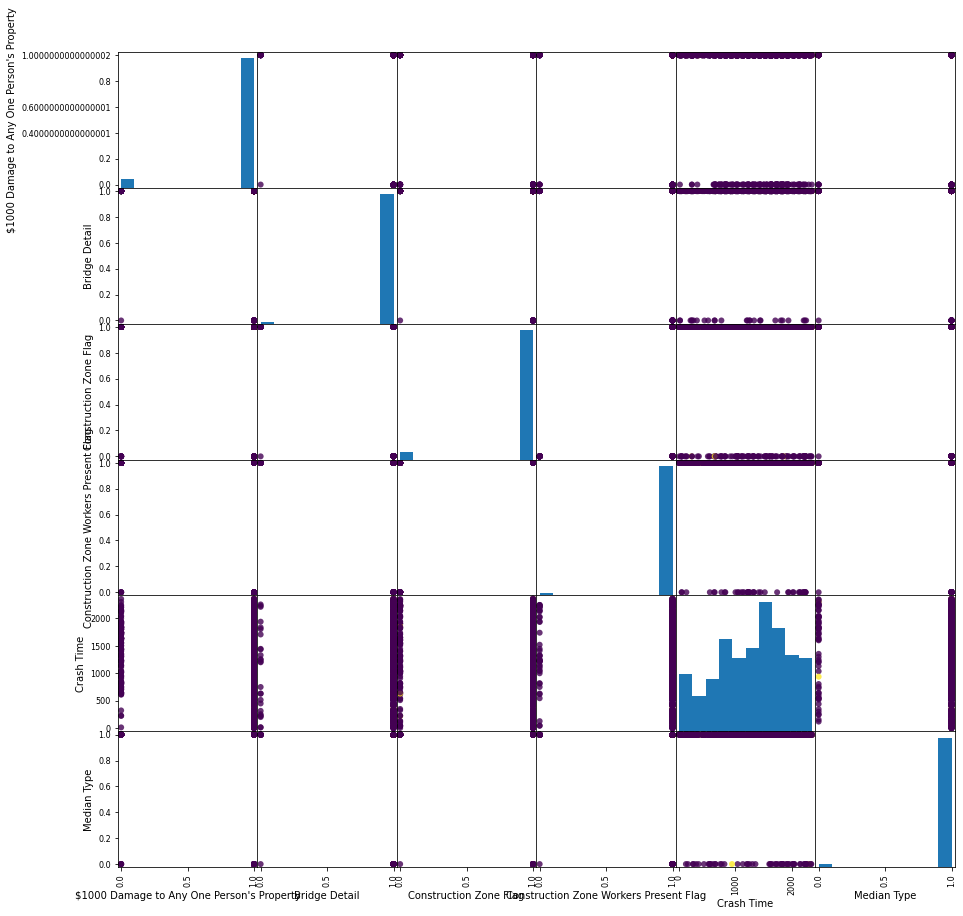

In [69]:
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = df_train.drop('Crash Severity',axis = 1)
y = df_train['Crash Severity']

attributes = X.columns[:6]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

As we can see that the distribution of the data is not normally distributed and also our dataset has more categorical values we will used Min-Max scaling instead of Standard Scaling. We use Standard Scaling when the data is assumed to be normally distributed which is not available here

In [70]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = df_train.drop('Crash Severity',axis = 1)
y = df_train['Crash Severity']


X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 26)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
print("Training dataset size: "+str(len(X_train)))
print("Test dataset size: "+str(len(X_test)))

Training dataset size: 1741
Test dataset size: 581


# Preprocessing ``test.csv`` 

In [133]:
df_test = pd.read_csv('test.csv')
df_test.head()

,$1000 Damage to Any One Person's Property,Bridge Detail,Construction Zone Flag,Construction Zone Workers Present Flag,Crash Time,Day of Week,Highway System,Intersecting Highway Number,Intersecting Street Name,Manner of Collision,Median Type,Median Width,Number of Entering Roads,Number of Lanes,Surface Condition,Surface Type,Surface Width,Weather Condition
0,Yes,NOT APPLICABLE,No,No,720,THURSDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-REAR END,No Data,No Data,97 - NOT APPLICABLE,No Data,1 - DRY,No Data,No Data,1 - CLEAR
1,Yes,NOT APPLICABLE,No,No,908,MONDAY,STATE SPUR,345,IH0345,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR
2,Yes,NOT APPLICABLE,No,No,1705,FRIDAY,STATE SPUR,No Data,NaN,ONE MOTOR VEHICLE - GOING STRAIGHT,No Data,40,97 - NOT APPLICABLE,6,1 - DRY,No Data,72,1 - CLEAR
3,Yes,NOT APPLICABLE,No,No,110,TUESDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR
4,Yes,NOT APPLICABLE,No,No,1550,SATURDAY,STATE SPUR,No Data,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-REAR END,No Data,40,97 - NOT APPLICABLE,8,1 - DRY,No Data,96,1 - CLEAR


In [134]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   $1000 Damage to Any One Person's Property  774 non-null    object
 1   Bridge Detail                              774 non-null    object
 2   Construction Zone Flag                     774 non-null    object
 3   Construction Zone Workers Present Flag     774 non-null    object
 4   Crash Time                                 774 non-null    int64 
 5   Day of Week                                774 non-null    object
 6   Highway System                             774 non-null    object
 7   Intersecting Highway Number                774 non-null    object
 8   Intersecting Street Name                   176 non-null    object
 9   Manner of Collision                        774 non-null    object
 10  Median Type                           

In [135]:
df_test.isnull().sum()

$1000 Damage to Any One Person's Property      0
Bridge Detail                                  0
Construction Zone Flag                         0
Construction Zone Workers Present Flag         0
Crash Time                                     0
Day of Week                                    0
Highway System                                 0
Intersecting Highway Number                    0
Intersecting Street Name                     598
Manner of Collision                            0
Median Type                                    0
Median Width                                   0
Number of Entering Roads                       0
Number of Lanes                                0
Surface Condition                              0
Surface Type                                   0
Surface Width                                  0
Weather Condition                              0
dtype: int64

**2) Data PreProcessing**

1) $1000 Damage to Any One Person's Property

In [136]:
df_test['$1000 Damage to Any One Person\'s Property'].value_counts()

Yes    736
No      38
Name: $1000 Damage to Any One Person's Property, dtype: int64

We will map the column with Yes as 1 and No as 0

In [137]:
df_test['$1000 Damage to Any One Person\'s Property'] = df_test['$1000 Damage to Any One Person\'s Property'].map({'Yes':1, 'No':0}).astype(int)

In [138]:
df_test['$1000 Damage to Any One Person\'s Property'].value_counts()

1    736
0     38
Name: $1000 Damage to Any One Person's Property, dtype: int64

2) Bridge Detail

In [139]:
df_test['Bridge Detail'].value_counts()

NOT APPLICABLE                            772
STRUCTURE NOT HIT                           1
VEHICLE RETAINED ON BRIDGE OR OVERPASS      1
Name: Bridge Detail, dtype: int64

The value "Not Applicable" has the highest count followed by others which have comparatively low count and thus we will replace all the other values with "Applicable"

In [140]:
df_test.replace({'Bridge Detail': {'STRUCTURE NOT HIT': 'APPLICABLE',
                                    'VEHICLE RETAINED ON BRIDGE OR OVERPASS': 'APPLICABLE',
                                    'CRASH INVOLVED UNDERPASS': 'APPLICABLE',
                                    'VEHICLE WENT OVER RAIL': 'APPLICABLE'}}, inplace=True)

In [141]:
df_test['Bridge Detail'].value_counts()

NOT APPLICABLE    772
APPLICABLE          2
Name: Bridge Detail, dtype: int64

We will map the column with NOT APPLICABLE as 1 and APPLICABLE as 0

In [142]:
df_test['Bridge Detail'] = df_test['Bridge Detail'].map({'NOT APPLICABLE':1, 'APPLICABLE':0}).astype(int)

In [143]:
df_test['Bridge Detail'].value_counts()

1    772
0      2
Name: Bridge Detail, dtype: int64

3) Construction Zone Flag 

In [144]:
df_test['Construction Zone Flag'].value_counts()

No     732
Yes     42
Name: Construction Zone Flag, dtype: int64

We will map the column with No as 1 and Yes as 0

In [145]:
df_test['Construction Zone Flag'] = df_test['Construction Zone Flag'].map({'No':1, 'Yes':0}).astype(int)

In [146]:
df_test['Construction Zone Flag'].value_counts()

1    732
0     42
Name: Construction Zone Flag, dtype: int64

4) Construction Zone Workers Present Flag 

In [147]:
df_test['Construction Zone Workers Present Flag'].value_counts()

No     759
Yes     15
Name: Construction Zone Workers Present Flag, dtype: int64

We will map the column with No as 1 and Yes as 0

In [148]:
df_test['Construction Zone Workers Present Flag'] = df_test['Construction Zone Workers Present Flag'].map({'No':1, 'Yes':0}).astype(int)

In [149]:
df_test['Construction Zone Workers Present Flag'].value_counts()

1    759
0     15
Name: Construction Zone Workers Present Flag, dtype: int64

5) Crash Time

In [150]:
df_test['Crash Time'].value_counts()

1800    9
1630    8
1700    7
900     7
1520    7
       ..
1248    1
1648    1
559     1
1012    1
1502    1
Name: Crash Time, Length: 444, dtype: int64

Since crash time is already an integer value we dont need to convert it.

6) Day of Week

In [151]:
df_test['Day of Week'].value_counts()

SATURDAY     133
FRIDAY       122
THURSDAY     117
WEDNESDAY    107
TUESDAY      103
SUNDAY        97
MONDAY        95
Name: Day of Week, dtype: int64

Day of Week is not an ordinal value since there is no order/rank and also there are 7 unique values for this attribute, we will transform this into one hot vector of length 7

In [152]:
cols = pd.get_dummies(df_test['Day of Week'], prefix= 'Day of Week')
df_test[cols.columns] = cols
df_test.drop('Day of Week', axis = 1, inplace = True)

7) Highway System

In [153]:
df_test['Highway System'].value_counts()

STATE SPUR    774
Name: Highway System, dtype: int64

Since it has only one value we will drop this column

In [154]:
df_test.drop('Highway System', axis = 1, inplace = True)

8) Intersecting Highway Number

In [155]:
df_test['Intersecting Highway Number'].value_counts()

No Data    657
35          71
345         41
75           5
Name: Intersecting Highway Number, dtype: int64

In [156]:
cols = pd.get_dummies(df_test['Intersecting Highway Number'], prefix= 'Intersecting Highway Number')
df_test[cols.columns] = cols
df_test.drop('Intersecting Highway Number', axis = 1, inplace = True)

9) Intersecting Street Name

In [157]:
df_test['Intersecting Street Name'].value_counts()

IH0035E              71
IH0345               41
N FIELD ST            9
N AKARD ST            8
ROUTH ST              6
N PEARL ST            6
US0075                5
OLIVE ST              4
N BECKLEY AVE         4
PEARL ST              3
N ST PAUL ST          3
N OLIVE ST            2
N RIVERFRONT BLVD     2
FIELD ST              2
FAIRMOUNT ST          1
MAPLE ROUTH RD        1
ROSS AVE              1
FARMONT RD            1
AKARD ST              1
HARWOOD ST            1
N OLIVE               1
N OLIVE RD            1
HOUSTON ST            1
MAPLE ST              1
Name: Intersecting Street Name, dtype: int64

We will drop this column

In [158]:
df_test.drop('Intersecting Street Name', axis = 1, inplace = True)

10) Manner of Collision 

In [159]:
df_test['Manner of Collision'].value_counts()

SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE       203
SAME DIRECTION - BOTH GOING STRAIGHT-REAR END        202
SAME DIRECTION - ONE STRAIGHT-ONE STOPPED            142
ONE MOTOR VEHICLE - GOING STRAIGHT                   101
ANGLE - BOTH GOING STRAIGHT                           58
OPPOSITE DIRECTION - ONE STRAIGHT-ONE LEFT TURN       27
ANGLE - ONE STRAIGHT-ONE RIGHT TURN                    9
SAME DIRECTION - ONE STRAIGHT-ONE RIGHT TURN           8
SAME DIRECTION - ONE STRAIGHT-ONE LEFT TURN            5
ONE MOTOR VEHICLE - TURNING LEFT                       4
ONE MOTOR VEHICLE - TURNING RIGHT                      2
ANGLE - ONE STRAIGHT-ONE LEFT TURN                     2
OPPOSITE DIRECTION - BOTH GOING STRAIGHT               2
OTHER                                                  1
ANGLE - ONE LEFT TURN-ONE STOPPED                      1
OPPOSITE DIRECTION - ONE RIGHT TURN-ONE LEFT TURN      1
ONE MOTOR VEHICLE - BACKING                            1
SAME DIRECTION - BOTH LEFT TURN

For this column we will merge the values into 4 major categories- Same direction, Opposite direction, Angle and One motor vehicle

In [160]:
df_test.replace({'Manner of Collision': {'SAME DIRECTION - BOTH GOING STRAIGHT-REAR END': 'SAME DIRECTION',
                                    'SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE': 'SAME DIRECTION',
                                    'SAME DIRECTION - ONE STRAIGHT-ONE STOPPED': 'SAME DIRECTION',
                                    'SAME DIRECTION - ONE STRAIGHT-ONE LEFT TURN': 'SAME DIRECTION',
                                    'SAME DIRECTION - ONE STRAIGHT-ONE RIGHT TURN': 'SAME DIRECTION',
                                    'SAME DIRECTION - BOTH RIGHT TURN': 'SAME DIRECTION',
                                    'SAME DIRECTION - BOTH LEFT TURN':'SAME DIRECTION'}}, inplace=True)

In [161]:
df_test.replace({'Manner of Collision': {'ONE MOTOR VEHICLE': 'ONE MOTOR VEHICLE',
                                    'ONE MOTOR VEHICLE - TURNING RIGHT': 'ONE MOTOR VEHICLE',
                                    'ONE MOTOR VEHICLE - TURNING LEFT': 'ONE MOTOR VEHICLE',
                                    'ONE MOTOR VEHICLE - OTHER': 'ONE MOTOR VEHICLE',
                                    'ONE MOTOR VEHICLE - BACKING': 'ONE MOTOR VEHICLE',
                                    'ONE MOTOR VEHICLE - GOING STRAIGHT':'ONE MOTOR VEHICLE'}}, inplace=True)

In [162]:
df_test.replace({'Manner of Collision': {'ANGLE - BOTH GOING STRAIGHT': 'ANGLE',
                                    'ANGLE - ONE STRAIGHT-ONE RIGHT TURN': 'ANGLE',
                                    'ANGLE - ONE STRAIGHT-ONE LEFT TURN': 'ANGLE',
                                    'ANGLE - ONE STRAIGHT-ONE STOPPED': 'ANGLE',
                                    'ANGLE - ONE STRAIGHT-ONE BACKING': 'ANGLE',
                                    'ANGLE - ONE RIGHT TURN-ONE STOPPED': 'ANGLE',
                                    'ANGLE - ONE LEFT TURN-ONE STOPPED':'ANGLE'}}, inplace=True)

In [163]:
df_test.replace({'Manner of Collision': {'OPPOSITE DIRECTION - ONE STRAIGHT-ONE LEFT TURN': 'OPPOSITE DIRECTION',
                                    'OPPOSITE DIRECTION - ONE STRAIGHT-ONE BACKING': 'OPPOSITE DIRECTION',
                                    'OPPOSITE DIRECTION - ONE BACKING-ONE STOPPED': 'OPPOSITE DIRECTION',
                                    'OPPOSITE DIRECTION - BOTH GOING STRAIGHT': 'OPPOSITE DIRECTION',
                                    'OPPOSITE DIRECTION - ONE RIGHT TURN-ONE LEFT TURN': 'OPPOSITE DIRECTION',
                                    'OPPOSITE DIRECTION - ONE LEFT TURN-ONE STOPPED': 'OPPOSITE DIRECTION'}}, inplace=True)

In [164]:
df_test.drop(df_test.index[df_test['Manner of Collision'] == 'OTHER'], inplace = True)

In [165]:
df_test['Manner of Collision'].value_counts()

SAME DIRECTION        562
ONE MOTOR VEHICLE     109
ANGLE                  71
OPPOSITE DIRECTION     31
Name: Manner of Collision, dtype: int64

In [166]:
df_test['Manner of Collision'].value_counts()

SAME DIRECTION        562
ONE MOTOR VEHICLE     109
ANGLE                  71
OPPOSITE DIRECTION     31
Name: Manner of Collision, dtype: int64

Now we will convert these values in one hot vector of length of 4

In [167]:
cols = pd.get_dummies(df_test['Manner of Collision'], prefix= 'Manner of Collision')
df_test[cols.columns] = cols
df_test.drop('Manner of Collision', axis = 1, inplace = True)

11) Median Type

In [168]:
df_test['Median Type'].value_counts()

No Data        750
UNPROTECTED     23
Name: Median Type, dtype: int64

In [169]:
df_test['Median Type'] = df_test['Median Type'].map({'No Data':1, 'UNPROTECTED':0}).astype(int)

In [170]:
df_test['Median Type'].value_counts()

1    750
0     23
Name: Median Type, dtype: int64

12) Median Width

In [171]:
df_test['Median Width'].value_counts()

40         603
No Data    170
Name: Median Width, dtype: int64

In [172]:
df_test['Median Width'] = df_test['Median Width'].map({'40':1, 'No Data':0}).astype(int)

In [173]:
df_test['Median Width'].value_counts()

1    603
0    170
Name: Median Width, dtype: int64

13) Number of Entering Roads

In [174]:
df_test['Number of Entering Roads'].value_counts()

97 - NOT APPLICABLE                  669
4 - FOUR ENTERING ROADS               62
2 - THREE ENTERING ROADS - T          19
3 - THREE ENTERING ROADS - Y          14
98 - OTHER (EXPLAIN IN NARRATIVE)      6
8 - CLOVERLEAF                         1
6 - SIX ENTERING ROADS                 1
7 - TRAFFIC CIRCLE                     1
Name: Number of Entering Roads, dtype: int64

For this column we will merge the values of 8 - CLOVERLEAF, 5 - FIVE ENTERING ROADS, 6 - SIX ENTERING ROADS and 98 - OTHER (EXPLAIN IN NARRATIVE) as OTHER

In [175]:
df_test.replace({'Number of Entering Roads': {'98 - OTHER (EXPLAIN IN NARRATIVE)': 'OTHER',
                                    '6 - SIX ENTERING ROADS': 'OTHER',
                                    '5 - FIVE ENTERING ROADS': 'OTHER',
                                    '8 - CLOVERLEAF': 'OTHER'}}, inplace=True)

In [176]:
df_test['Number of Entering Roads'].value_counts()

97 - NOT APPLICABLE             669
4 - FOUR ENTERING ROADS          62
2 - THREE ENTERING ROADS - T     19
3 - THREE ENTERING ROADS - Y     14
OTHER                             8
7 - TRAFFIC CIRCLE                1
Name: Number of Entering Roads, dtype: int64

In [177]:
cols = pd.get_dummies(df_test['Number of Entering Roads'], prefix= 'Number of Entering Roads')
df_test[cols.columns] = cols
df_test.drop('Number of Entering Roads', axis = 1, inplace = True)

14) Surface Condition

In [178]:
df_test['Surface Condition'].value_counts()

1 - DRY                              694
2 - WET                               68
6 - ICE                                5
3 - STANDING WATER                     5
98 - OTHER (EXPLAIN IN NARRATIVE)      1
Name: Surface Condition, dtype: int64

For this column we will merge the values of 99 - UNKNOWN and 7 - SAND, MUD, DIRT as 98 - OTHER (EXPLAIN IN NARRATIVE)

In [179]:
df_test.replace({'Surface Condition': {'99 - UNKNOWN': '98 - OTHER (EXPLAIN IN NARRATIVE)',
                                    '7 - SAND, MUD, DIRT': '98 - OTHER (EXPLAIN IN NARRATIVE)'}}, inplace=True)

In [180]:
df_test['Surface Condition'].value_counts()

1 - DRY                              694
2 - WET                               68
6 - ICE                                5
3 - STANDING WATER                     5
98 - OTHER (EXPLAIN IN NARRATIVE)      1
Name: Surface Condition, dtype: int64

In [181]:
cols = pd.get_dummies(df_test['Surface Condition'], prefix= 'Surface Condition')
df_test[cols.columns] = cols
df_test.drop('Surface Condition', axis = 1, inplace = True)

15) Surface Type

In [182]:
df_test['Surface Type'].value_counts()

No Data    773
Name: Surface Type, dtype: int64

Since there is just one unique value we will drop this column

In [183]:
df_test.drop('Surface Type', axis = 1, inplace = True)

15) Surface Width

In [184]:
df_test['Surface Width'].value_counts()

96         414
72         189
No Data    170
Name: Surface Width, dtype: int64

In [185]:
cols = pd.get_dummies(df_test['Surface Width'], prefix= 'Surface Width')
df_test[cols.columns] = cols
df_test.drop('Surface Width', axis = 1, inplace = True)

16) Weather Condition

In [186]:
df_test['Weather Condition'].value_counts()

1 - CLEAR                            622
2 - CLOUDY                            94
3 - RAIN                              54
6 - FOG                                2
98 - OTHER (EXPLAIN IN NARRATIVE)      1
Name: Weather Condition, dtype: int64

In [187]:
df_test.replace({'Weather Condition': {'99 - UNKNOWN': '98 - OTHER (EXPLAIN IN NARRATIVE)',
                                 '5 - SNOW': '98 - OTHER (EXPLAIN IN NARRATIVE)',
                                 '4 - SLEET/HAIL': '98 - OTHER (EXPLAIN IN NARRATIVE)'}}, inplace = True)

In [188]:
df_test['Weather Condition'].value_counts()

1 - CLEAR                            622
2 - CLOUDY                            94
3 - RAIN                              54
6 - FOG                                2
98 - OTHER (EXPLAIN IN NARRATIVE)      1
Name: Weather Condition, dtype: int64

In [189]:
cols = pd.get_dummies(df_test['Weather Condition'], prefix= 'Weather Condition')
df_test[cols.columns] = cols
df_test.drop('Weather Condition', axis = 1, inplace = True)

17) Number of lanes

In [190]:
df_test['Number of Lanes'].value_counts()

8          414
6          189
No Data    170
Name: Number of Lanes, dtype: int64

In [191]:
cols = pd.get_dummies(df_test['Number of Lanes'], prefix= 'Number of Lanes')
df_test[cols.columns] = cols
df_test.drop('Number of Lanes', axis = 1, inplace = True)

In [192]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 0 to 773
Data columns (total 44 columns):
 #   Column                                                 Non-Null Count  Dtype
---  ------                                                 --------------  -----
 0   $1000 Damage to Any One Person's Property              773 non-null    int64
 1   Bridge Detail                                          773 non-null    int64
 2   Construction Zone Flag                                 773 non-null    int64
 3   Construction Zone Workers Present Flag                 773 non-null    int64
 4   Crash Time                                             773 non-null    int64
 5   Median Type                                            773 non-null    int64
 6   Median Width                                           773 non-null    int64
 7   Day of Week_FRIDAY                                     773 non-null    uint8
 8   Day of Week_MONDAY                                     773 non-null   

# Machine learning models 

## 1) KNN Classifier

In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
param_grid = {'n_neighbors': list(range(3,20,2))}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn,param_grid, cv=5, scoring='roc_auc', refit= True)
grid.fit(X_train, y_train)
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'n_neighbors': 15}
Best cross-validation score: 0.74


In [165]:
pred_knn = grid.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))
from sklearn.metrics import roc_auc_score
print("ROC_AUC Score for KNN Classifier:  {:.2f}".format(roc_auc_score(y_test, pred_knn)))

[[570   0]
 [ 11   0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       570
           1       0.00      0.00      0.00        11

    accuracy                           0.98       581
   macro avg       0.49      0.50      0.50       581
weighted avg       0.96      0.98      0.97       581

ROC_AUC Score for KNN Classifier:  0.50


[0.01893287 0.03636364 0.         0.         1.        ]
[1.         0.36363636 0.         0.         0.        ]
[0.         0.06666667 0.13333333 0.2       ]
3


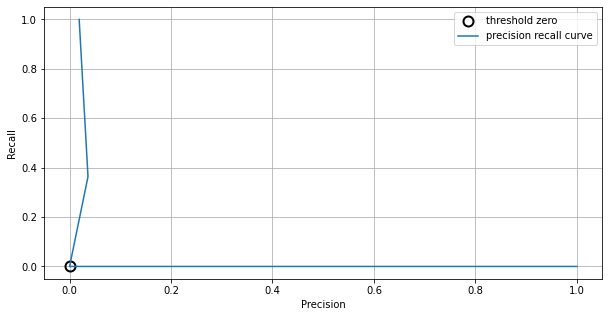

In [166]:
# Recall - Precision Graph
plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_test, grid.predict_proba(X_test)[:, 1])
print(precision)
print(recall)
print(thresholds)
close_zero = np.argmin(np.abs(thresholds - 0.5))
print(close_zero)

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [167]:
y_predict_test = np.where(grid.predict_proba(X_test) >= thresholds[close_zero], 1, 0)
y_predict_train = np.where(grid.predict_proba(X_train) >= thresholds[close_zero], 1, 0)
print('Before the post processing: ')
print('Precision: ', precision_score(y_train, y_predict_train[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))

Before the post processing: 
Precision:  0.38461538461538464
Recall:  0.0


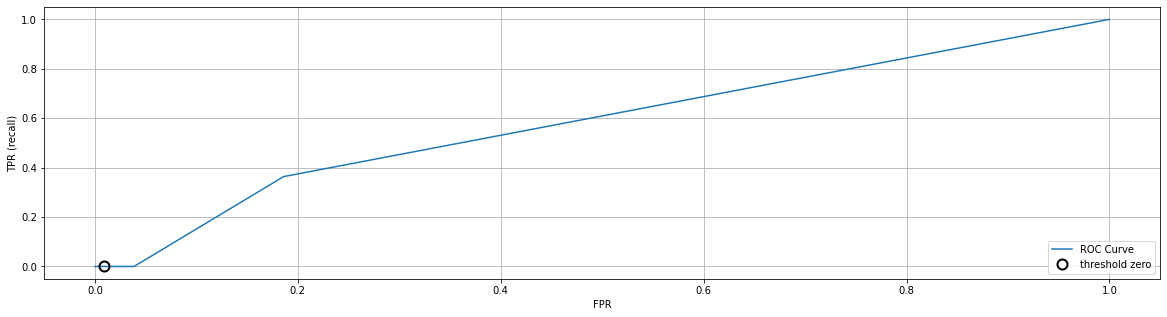

In [168]:
fpr, tpr, thresholds = roc_curve(y_test, grid.predict_proba(X_test)[:,1])

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
i = np.argmin(np.abs(thresholds-0.5))
plt.plot(fpr[i], tpr[i], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [169]:
y_predict_test = np.where(grid.predict_proba(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(grid.predict_proba(X_train) >= thresholds[i], 1, 0)
print('Before the ROC-AUC post processing: ')
print('Precision: ', precision_score(y_test,y_predict_test[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))
print('F1-score: ', f1_score(y_test,y_predict_test[:,1]))
print('ROC Score: ', roc_auc_score(y_test,y_predict_test[:,1]))

Before the ROC-AUC post processing: 
Precision:  0.0
Recall:  0.0
F1-score:  0.0
ROC Score:  0.4956140350877193


In [170]:
print('Accuracy of the Model: ', accuracy_score(y_test, pred_knn), '\n')
print('Confusion Matrix of the Model:\n', confusion_matrix(y_test, pred_knn), '\n')
print('Classification Reaport of the Model:\n', classification_report(y_test, pred_knn))

Accuracy of the Model:  0.9810671256454389 

Confusion Matrix of the Model:
 [[570   0]
 [ 11   0]] 

Classification Reaport of the Model:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       570
           1       0.00      0.00      0.00        11

    accuracy                           0.98       581
   macro avg       0.49      0.50      0.50       581
weighted avg       0.96      0.98      0.97       581



**Post Processing**

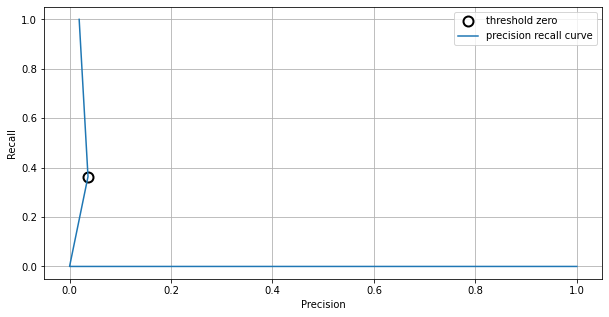

In [171]:
# Recall - Precision Graph
plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_test, grid.predict_proba(X_test)[:, 1])

i = np.argmin(np.abs(recall-0.19))

plt.plot(precision[i], recall[i], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [172]:
y_predict_test = np.where(grid.predict_proba(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(grid.predict_proba(X_train) >= thresholds[i], 1, 0)
print('After the Precision - Recall post processing: ')
print('Precision: ', precision_score(y_train, y_predict_train[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))

After the Precision - Recall post processing: 
Precision:  0.08960573476702509
Recall:  0.36363636363636365


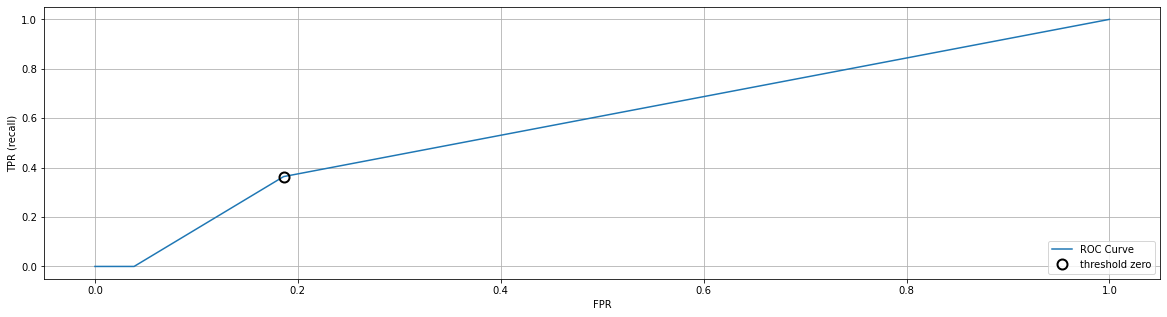

In [218]:
fpr, tpr, thresholds = roc_curve(y_test, grid.predict_proba(X_test)[:,1])

i = np.argmin(np.abs(tpr - 0.4))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.plot(fpr[i], tpr[i], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [219]:
y_predict_test = np.where(grid.predict_proba(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(grid.predict_proba(X_train) >= thresholds[i], 1, 0)
print('After the ROC-AUC post processing: ')
print('Precision: ', precision_score(y_test,y_predict_test[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))
print('F1-score: ', f1_score(y_test,y_predict_test[:,1]))
print('ROC Score: ', roc_auc_score(y_test,y_predict_test[:,1]))

After the ROC-AUC post processing: 
Precision:  0.03636363636363636
Recall:  0.36363636363636365
F1-score:  0.06611570247933883
ROC Score:  0.5888357256778309


## 2) Logistic Regression

In [189]:
from sklearn.linear_model import LogisticRegression
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty = ['l2']
solver = ['liblinear','lbfgs']
param_grid = dict(C = c_range ,penalty = penalty,solver = solver ,max_iter = [1000])
grid_search_log = GridSearchCV(LogisticRegression(class_weight='balanced'),param_grid, cv=5, scoring = 'roc_auc',refit=True )
grid_search_log.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.79


In [190]:
pred_log = grid_search_log.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_log))
print(classification_report(y_test, pred_log))
from sklearn.metrics import roc_auc_score
print("ROC_AUC Score for Logistic Regression:  {:.2f}".format(roc_auc_score(y_test, pred_log)))

[[425 145]
 [  5   6]]
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       570
           1       0.04      0.55      0.07        11

    accuracy                           0.74       581
   macro avg       0.51      0.65      0.46       581
weighted avg       0.97      0.74      0.84       581

ROC_AUC Score for Logistic Regression:  0.65


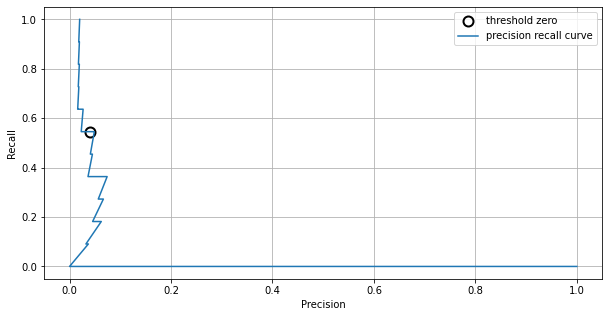

In [191]:
# Recall - Precision Graph
plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_test, grid_search_log.predict_proba(X_test)[:, 1])
close_zero = np.argmin(np.abs(thresholds - 0.5))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [192]:
y_predict_test = np.where(grid_search_log.predict_proba(X_test) >= thresholds[close_zero], 1, 0)
y_predict_train = np.where(grid_search_log.predict_proba(X_train) >= thresholds[close_zero], 1, 0)
print('Before the post processing: ')
print('Precision: ', precision_score(y_train, y_predict_train[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))

Before the post processing: 
Precision:  0.05569620253164557
Recall:  0.5454545454545454


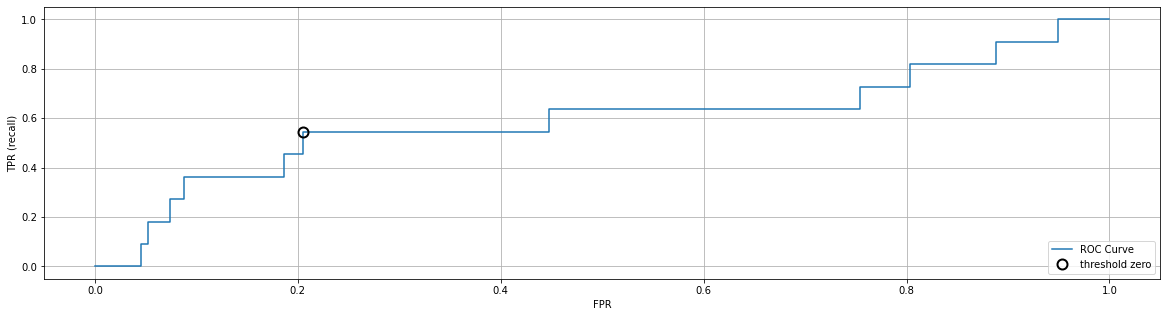

In [193]:
# ROC - AUC curve
fpr, tpr, thresholds = roc_curve(y_test, grid_search_log.predict_proba(X_test)[:,1])

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
i = np.argmin(np.abs(thresholds-0.5))
plt.plot(fpr[i], tpr[i], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [195]:
y_predict_test = np.where(grid_search_log.predict_proba(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(grid_search_log.predict_proba(X_train) >= thresholds[i], 1, 0)
print('Before the ROC-AUC post processing: ')
print('Precision: ', precision_score(y_test,y_predict_test[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))
print('F1-score: ', f1_score(y_test,y_predict_test[:,1]))
print('ROC Score: ', roc_auc_score(y_test,y_predict_test[:,1]))

Before the ROC-AUC post processing: 
Precision:  0.04878048780487805
Recall:  0.5454545454545454
F1-score:  0.08955223880597014
ROC Score:  0.6700956937799043


In [197]:
print('Accuracy of the Model: ', accuracy_score(y_test, pred_log), '\n')
print('Confusion Matrix of the Model:\n', confusion_matrix(y_test, pred_log), '\n')
print('Classification Report of the Model:\n', classification_report(y_test, pred_log))

Accuracy of the Model:  0.7418244406196214 

Confusion Matrix of the Model:
 [[425 145]
 [  5   6]] 

Classification Report of the Model:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85       570
           1       0.04      0.55      0.07        11

    accuracy                           0.74       581
   macro avg       0.51      0.65      0.46       581
weighted avg       0.97      0.74      0.84       581



**Post Preprocessing**

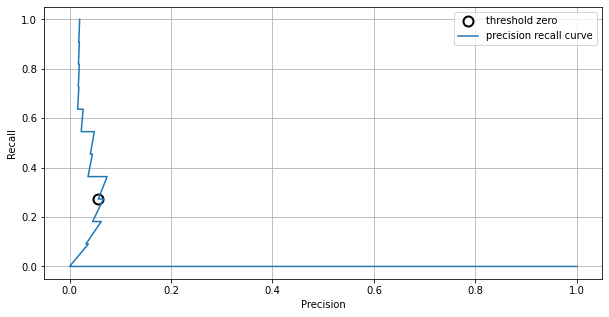

In [199]:
# Recall - Precision Graph
plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_test, grid_search_log.predict_proba(X_test)[:, 1])

i = np.argmin(np.abs(recall - 0.3))

plt.plot(precision[i], recall[i], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [200]:
y_predict_test = np.where(grid_search_log.predict_proba(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(grid_search_log.predict_proba(X_train) >= thresholds[i], 1, 0)
print('After the Precision - Recall post processing: ')
print('Precision: ', precision_score(y_train, y_predict_train[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))

After the Precision - Recall post processing: 
Precision:  0.08695652173913043
Recall:  0.2727272727272727


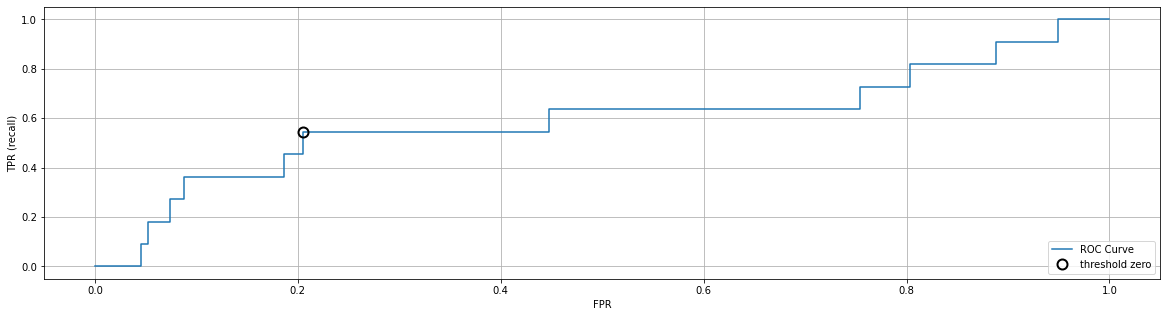

In [214]:
fpr, tpr, thresholds = roc_curve(y_test, grid_search_log.predict_proba(X_test)[:,1])

i = np.argmin(np.abs(tpr - 0.55))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.plot(fpr[i], tpr[i], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [215]:
y_predict_test = np.where(grid_search_log.predict_proba(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(grid_search_log.predict_proba(X_train) >= thresholds[i], 1, 0)
print('After the ROC-AUC post processing: ')
print('Precision: ', precision_score(y_test,y_predict_test[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))
print('F1-score: ', f1_score(y_test,y_predict_test[:,1]))
print('ROC Score: ', roc_auc_score(y_test,y_predict_test[:,1]))

After the ROC-AUC post processing: 
Precision:  0.04878048780487805
Recall:  0.5454545454545454
F1-score:  0.08955223880597014
ROC Score:  0.6700956937799043


## 3) Linear SVC

In [230]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print('Parameter Grid: ', param_grid)
linear_svc = GridSearchCV(LinearSVC(), param_grid, cv = 5,return_train_score=True, scoring = 'roc_auc')
linear_svc.fit(X_train, y_train)
print('Best Hyperparameter for Linear SVC: ', linear_svc_grid.best_params_)
print('Best cross-Validation Score: ', linear_svc_grid.best_score_)

Parameter Grid:  {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Best Hyperparameter for Linear SVC:  {'C': 0.01}
Best cross-Validation Score:  0.7246125161027865


In [232]:
y_pred = linear_svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Roc Auc Score for Linear SVC:  {:.2f}".format(roc_auc_score(y_test, y_pred)))

0.9810671256454389
[[570   0]
 [ 11   0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       570
           1       0.00      0.00      0.00        11

    accuracy                           0.98       581
   macro avg       0.49      0.50      0.50       581
weighted avg       0.96      0.98      0.97       581

Roc Auc Score for Linear SVC:  0.50


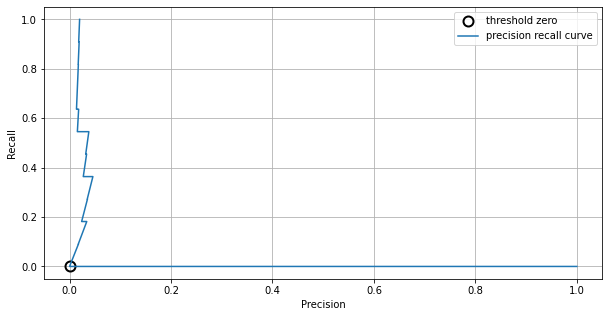

In [233]:
# Recall - Precision Graph
plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_test, linear_svc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds - 0.5))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [234]:
y_predict_test = np.where(linear_svc.decision_function(X_test) >= thresholds[close_zero], 1, 0)
y_predict_train = np.where(linear_svc.decision_function(X_train) >= thresholds[close_zero], 1, 0)
print('Before the post processing: ')
print('Precision: ', precision_score(y_test, y_predict_test))
print('Recall: ', recall_score(y_test,y_predict_test))

Before the post processing: 
Precision:  0.0
Recall:  0.0


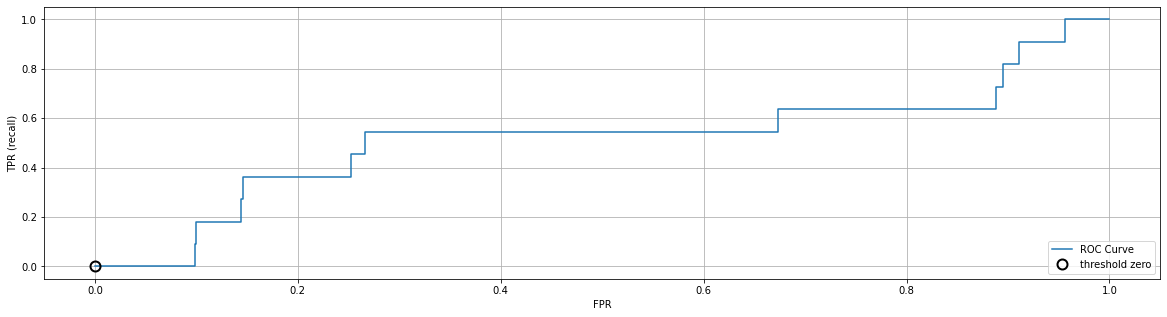

In [235]:
fpr, tpr, thresholds = roc_curve(y_test, linear_svc.decision_function(X_test))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
i = np.argmin(np.abs(thresholds-0.5))
plt.plot(fpr[i], tpr[i], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [236]:
y_predict_test = np.where(linear_svc.decision_function(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(linear_svc.decision_function(X_train) >= thresholds[i], 1, 0)
print('Before the ROC-AUC post processing: ')
print('Precision: ', precision_score(y_test,y_predict_test))
print('Recall: ', recall_score(y_test,y_predict_test))
print('F1-score: ', f1_score(y_test,y_predict_test))
print('ROC-AUC Score: ', roc_auc_score(y_test, y_predict_test))

Before the ROC-AUC post processing: 
Precision:  0.0
Recall:  0.0
F1-score:  0.0
ROC-AUC Score:  0.5


**Post Preprocessing**

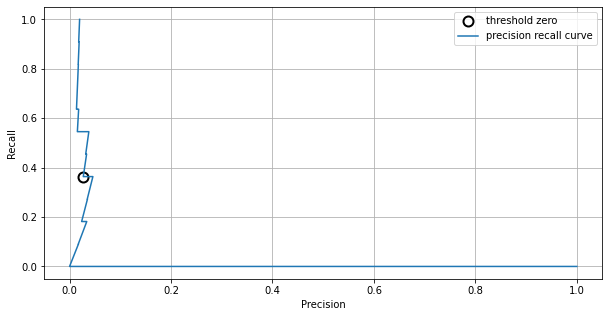

In [262]:
# Recall - Precision Graph
plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_test, linear_svc.decision_function(X_test))

i = np.argmin(np.abs(recall - 0.4))

plt.plot(precision[i], recall[i], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [263]:
y_predict_test = np.where(linear_svc.decision_function(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(linear_svc.decision_function(X_train) >= thresholds[i], 1, 0)
print('After the Precision - Recall post processing: ')
print('Precision: ', precision_score(y_train, y_predict_train))
print('Recall: ', recall_score(y_test,y_predict_test))

After the Precision - Recall post processing: 
Precision:  0.05333333333333334
Recall:  0.36363636363636365


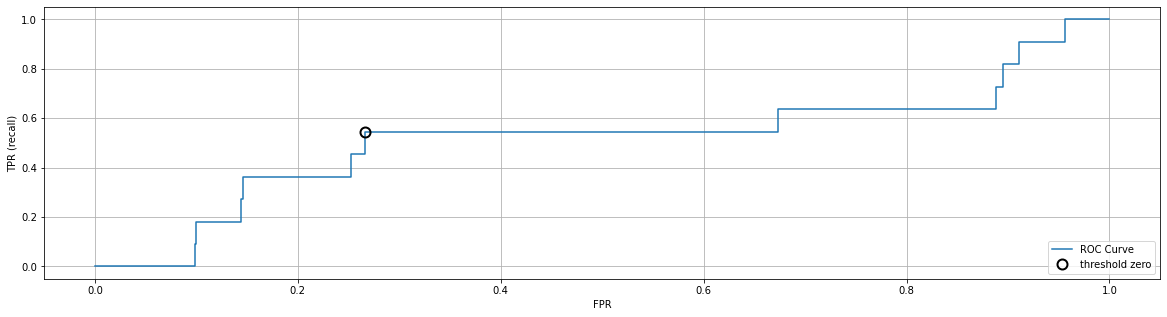

In [272]:
fpr, tpr, thresholds = roc_curve(y_test, linear_svc_grid.decision_function(X_test))

i = np.argmin(np.abs(tpr - 0.55))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.plot(fpr[i], tpr[i], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [273]:
y_predict_test = np.where(linear_svc_grid.decision_function(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(linear_svc_grid.decision_function(X_train) >= thresholds[i], 1, 0)
print('After the ROC-AUC post processing: ')
print('Precision: ', precision_score(y_test,y_predict_test))
print('Recall: ', recall_score(y_test,y_predict_test))
print('F1-score: ', f1_score(y_test,y_predict_test))
print('ROC AUC Score: ', roc_auc_score(y_test, y_predict_test))

After the ROC-AUC post processing: 
Precision:  0.0379746835443038
Recall:  0.5454545454545454
F1-score:  0.07100591715976332
ROC AUC Score:  0.6393939393939394


## 4) SVC(kernel = 'linear')

In [284]:
param_linear = dict(kernel=['linear'], C=[0.001, 0.01, 0.1, 1, 10, 100])
grid_linear = GridSearchCV(SVC(), param_linear, cv=5, scoring='roc_auc',return_train_score=True,)
grid_linear.fit(X_train, y_train)
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_poly.best_score_))

Best parameters: {'C': 0.001, 'kernel': 'linear'}
Best cross-validation score: 0.61


In [285]:
pred_knn = grid_linear.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))
from sklearn.metrics import roc_auc_score
print("ROC_AUC Score for SVC Classifier:  {:.2f}".format(roc_auc_score(y_test, pred_knn)))

[[570   0]
 [ 11   0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       570
           1       0.00      0.00      0.00        11

    accuracy                           0.98       581
   macro avg       0.49      0.50      0.50       581
weighted avg       0.96      0.98      0.97       581

ROC_AUC Score for SVC Classifier:  0.50


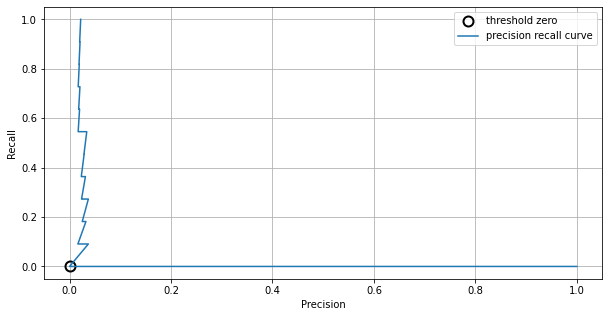

In [286]:
# Recall - Precision Graph
plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_test, grid_linear.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds - 0.5))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [287]:
y_predict_test = np.where(grid_linear.decision_function(X_test) >= thresholds[close_zero], 1, 0)
y_predict_train = np.where(grid_poly.decision_function(X_train) >= thresholds[close_zero], 1, 0)
print('Before the post processing: ')
print('Precision: ', precision_score(y_test, y_predict_test))
print('Recall: ', recall_score(y_test,y_predict_test))

Before the post processing: 
Precision:  0.0
Recall:  0.0


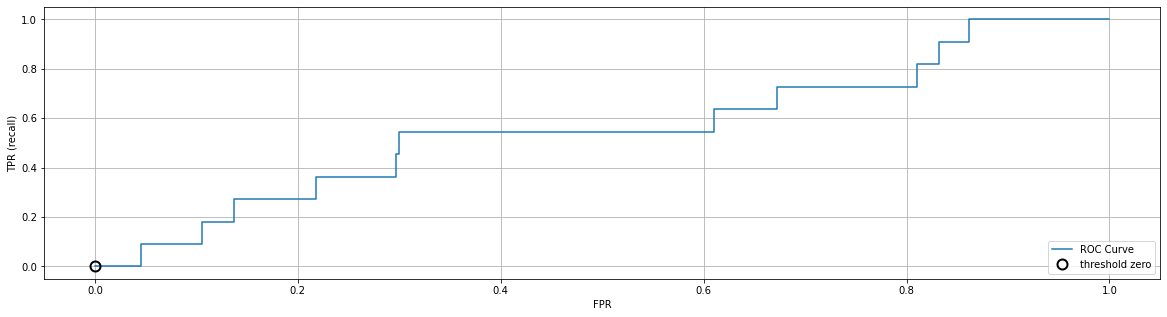

In [288]:
fpr, tpr, thresholds = roc_curve(y_test, grid_linear.decision_function(X_test))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
i = np.argmin(np.abs(thresholds-0.5))
plt.plot(fpr[i], tpr[i], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [289]:
y_predict_test = np.where(grid_linear.decision_function(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(grid_linear.decision_function(X_train) >= thresholds[i], 1, 0)
print('Before the ROC-AUC post processing: ')
print('Precision: ', precision_score(y_test,y_predict_test))
print('Recall: ', recall_score(y_test,y_predict_test))
print('F1-score: ', f1_score(y_test,y_predict_test))
print('ROC-AUC Score: ', roc_auc_score(y_test, y_predict_test))

Before the ROC-AUC post processing: 
Precision:  0.0
Recall:  0.0
F1-score:  0.0
ROC-AUC Score:  0.5


**Post Preprocessing**

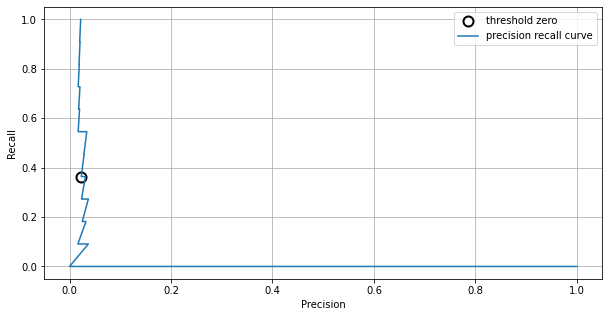

In [294]:
# Recall - Precision Graph
plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_test, grid_linear.decision_function(X_test))

i = np.argmin(np.abs(recall - 0.38))

plt.plot(precision[i], recall[i], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [295]:
y_predict_test = np.where(grid_linear.decision_function(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(grid_linear.decision_function(X_train) >= thresholds[i], 1, 0)
print('After the Precision - Recall post processing: ')
print('Precision: ', precision_score(y_train, y_predict_train))
print('Recall: ', recall_score(y_test,y_predict_test))

After the Precision - Recall post processing: 
Precision:  0.03732809430255403
Recall:  0.36363636363636365


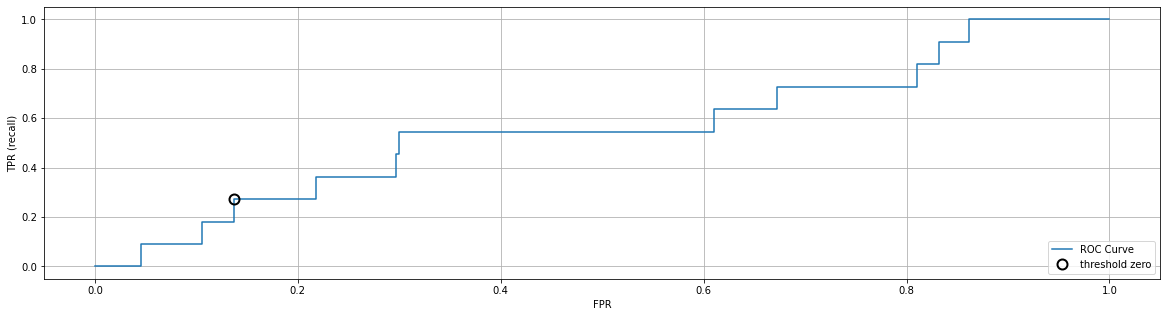

In [308]:
fpr, tpr, thresholds = roc_curve(y_test, grid_linear.decision_function(X_test))

i = np.argmin(np.abs(tpr - 0.25))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.plot(fpr[i], tpr[i], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [309]:
y_predict_test = np.where(grid_linear.decision_function(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(grid_linear.decision_function(X_train) >= thresholds[i], 1, 0)
print('After the ROC-AUC post processing: ')
print('Precision: ', precision_score(y_test,y_predict_test))
print('Recall: ', recall_score(y_test,y_predict_test))
print('F1-score: ', f1_score(y_test,y_predict_test))
print('ROC AUC Score: ', roc_auc_score(y_test, y_predict_test))

After the ROC-AUC post processing: 
Precision:  0.037037037037037035
Recall:  0.2727272727272727
F1-score:  0.06521739130434782
ROC AUC Score:  0.5679425837320574


## 5) SVC(kernel = 'poly')

In [311]:
param_poly = dict(kernel=['poly'], C=[0.001, 0.01, 0.1, 1, 10, 100])
grid_poly = GridSearchCV(SVC(), param_poly, cv=5, scoring='roc_auc')
grid_poly.fit(X_train, y_train)
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_poly.best_score_))

Best parameters: {'C': 0.001, 'kernel': 'poly'}
Best cross-validation score: 0.54


In [312]:
y_pred = grid_poly.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Roc_Auc Score for SVC kernel Poly:  {:.2f}".format(roc_auc_score(y_test, y_pred)))

0.9810671256454389
[[570   0]
 [ 11   0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       570
           1       0.00      0.00      0.00        11

    accuracy                           0.98       581
   macro avg       0.49      0.50      0.50       581
weighted avg       0.96      0.98      0.97       581

Roc_Auc Score for SVC kernel Poly:  0.50


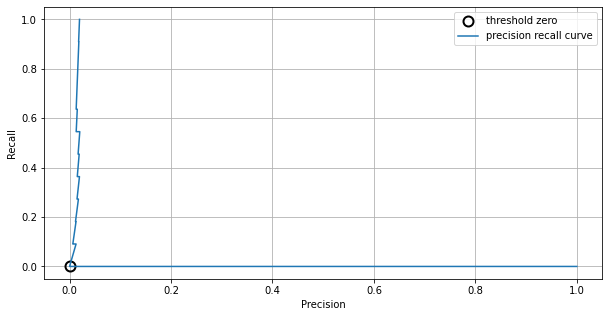

In [313]:
# Recall - Precision Graph
plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_test, grid_poly.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds - 0.5))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [315]:
y_predict_test = np.where(grid_poly.decision_function(X_test) >= thresholds[close_zero], 1, 0)
y_predict_train = np.where(grid_poly.decision_function(X_train) >= thresholds[close_zero], 1, 0)
print('Before the post processing: ')
print('Precision: ', precision_score(y_test, y_predict_test))
print('Recall: ', recall_score(y_test,y_predict_test))

Before the post processing: 
Precision:  0.0
Recall:  0.0


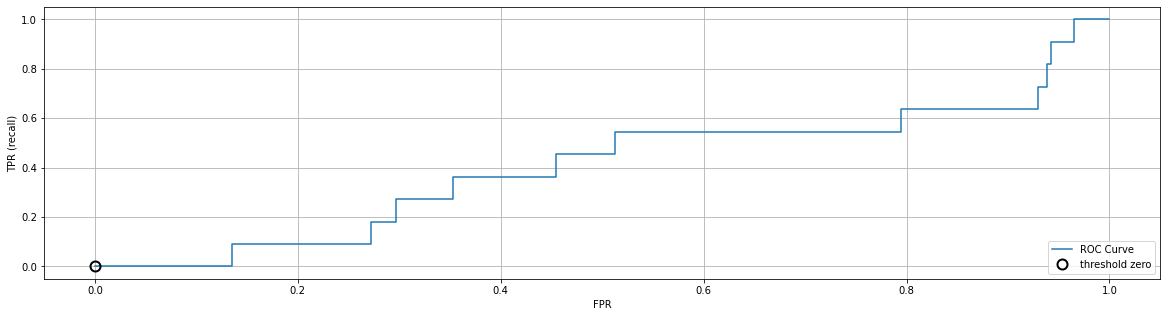

In [316]:
fpr, tpr, thresholds = roc_curve(y_test, grid_poly.decision_function(X_test))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
i = np.argmin(np.abs(thresholds-0.5))
plt.plot(fpr[i], tpr[i], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [317]:
y_predict_test = np.where(grid_poly.decision_function(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(grid_poly.decision_function(X_train) >= thresholds[i], 1, 0)
print('Before the ROC-AUC post processing: ')
print('Precision: ', precision_score(y_test,y_predict_test))
print('Recall: ', recall_score(y_test,y_predict_test))
print('F1-score: ', f1_score(y_test,y_predict_test))
print('ROC-AUC Score: ', roc_auc_score(y_test, y_predict_test))

Before the ROC-AUC post processing: 
Precision:  0.0
Recall:  0.0
F1-score:  0.0
ROC-AUC Score:  0.5


**Post Preprocessing**

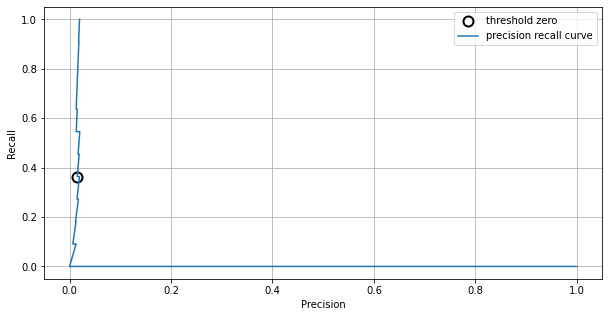

In [322]:
# Recall - Precision Graph
plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_test, grid_poly.decision_function(X_test))

i = np.argmin(np.abs(recall - 0.4))

plt.plot(precision[i], recall[i], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [323]:
y_predict_test = np.where(grid_poly.decision_function(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(grid_poly.decision_function(X_train) >= thresholds[i], 1, 0)
print('After the Precision - Recall post processing: ')
print('Precision: ', precision_score(y_train, y_predict_train))
print('Recall: ', recall_score(y_test,y_predict_test))

After the Precision - Recall post processing: 
Precision:  0.025
Recall:  0.36363636363636365


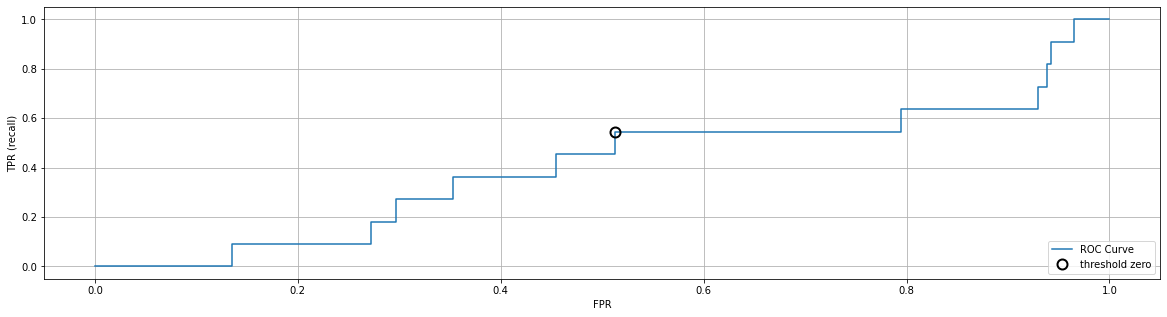

In [339]:
fpr, tpr, thresholds = roc_curve(y_test, grid_poly.decision_function(X_test))

i = np.argmin(np.abs(tpr - 0.5))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.plot(fpr[i], tpr[i], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [340]:
y_predict_test = np.where(grid_poly.decision_function(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(grid_poly.decision_function(X_train) >= thresholds[i], 1, 0)
print('After the ROC-AUC post processing: ')
print('Precision: ', precision_score(y_test,y_predict_test))
print('Recall: ', recall_score(y_test,y_predict_test))
print('F1-score: ', f1_score(y_test,y_predict_test))
print('ROC AUC Score: ', roc_auc_score(y_test, y_predict_test))

After the ROC-AUC post processing: 
Precision:  0.020134228187919462
Recall:  0.5454545454545454
F1-score:  0.038834951456310676
ROC AUC Score:  0.5165869218500797


## 6)  SVC (kernel = 'rbf')

In [343]:
param_grid = {'C':[0.01, 0.1, 1, 10, 100], 'gamma':[0.01, 0.1, 1, 10, 100]}
print('Parameter Grid: ', param_grid)
rbf_kernel_grid = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = 5,return_train_score=True, scoring = 'roc_auc')
rbf_kernel_grid.fit(X_train, y_train)
print("Best Hyperparameter for SVC(kernel = 'rbf'): ", rbf_kernel_grid.best_params_)
print('Best cross-Validation Score: ', rbf_kernel_grid.best_score_)

Parameter Grid:  {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}
Best Hyperparameter for SVC(kernel = 'rbf'):  {'C': 1, 'gamma': 100}
Best cross-Validation Score:  0.5983320903112076


In [344]:
y_pred = rbf_kernel_grid.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Roc_Auc Score for Linear SVC:  {:.2f}".format(roc_auc_score(y_test, y_pred)))

0.9810671256454389
[[570   0]
 [ 11   0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       570
           1       0.00      0.00      0.00        11

    accuracy                           0.98       581
   macro avg       0.49      0.50      0.50       581
weighted avg       0.96      0.98      0.97       581

Roc_Auc Score for Linear SVC:  0.50


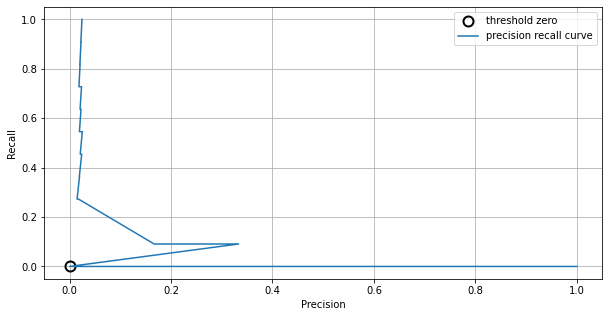

In [345]:
# Recall - Precision Graph
plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_test, rbf_kernel_grid.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds - 0.5))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [346]:
y_predict_test = np.where(rbf_kernel_grid.decision_function(X_test) >= thresholds[close_zero], 1, 0)
y_predict_train = np.where(rbf_kernel_grid.decision_function(X_train) >= thresholds[close_zero], 1, 0)
print('Before the post processing: ')
print('Precision: ', precision_score(y_test, y_predict_test))
print('Recall: ', recall_score(y_test,y_predict_test))

Before the post processing: 
Precision:  0.0
Recall:  0.0


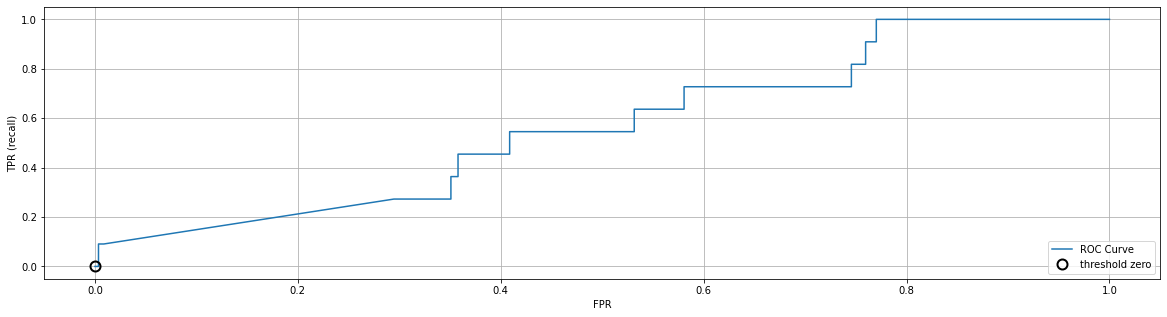

In [347]:
fpr, tpr, thresholds = roc_curve(y_test, rbf_kernel_grid.decision_function(X_test))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
i = np.argmin(np.abs(thresholds-0.5))
plt.plot(fpr[i], tpr[i], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [348]:
y_predict_test = np.where(rbf_kernel_grid.decision_function(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(rbf_kernel_grid.decision_function(X_train) >= thresholds[i], 1, 0)
print('Before the ROC-AUC post processing: ')
print('Precision: ', precision_score(y_test,y_predict_test))
print('Recall: ', recall_score(y_test,y_predict_test))
print('F1-score: ', f1_score(y_test,y_predict_test))
print('ROC-AUC Score: ', roc_auc_score(y_test, y_predict_test))

Before the ROC-AUC post processing: 
Precision:  0.0
Recall:  0.0
F1-score:  0.0
ROC-AUC Score:  0.5


**Post Preprocessing**

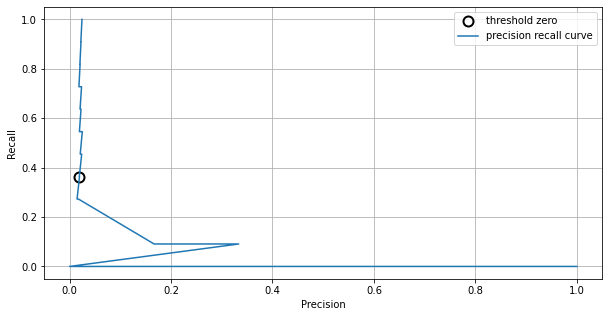

In [353]:
# Recall - Precision Graph
plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_test, rbf_kernel_grid.decision_function(X_test))

i = np.argmin(np.abs(recall - 0.4))

plt.plot(precision[i], recall[i], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [354]:
y_predict_test = np.where(rbf_kernel_grid.decision_function(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(rbf_kernel_grid.decision_function(X_train) >= thresholds[i], 1, 0)
print('After the Precision - Recall post processing: ')
print('Precision: ', precision_score(y_train, y_predict_train))
print('Recall: ', recall_score(y_test,y_predict_test))

After the Precision - Recall post processing: 
Precision:  1.0
Recall:  0.36363636363636365


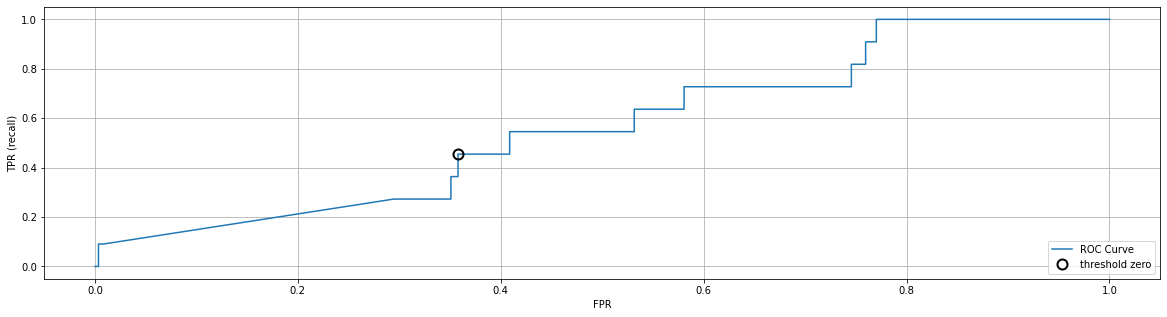

In [355]:
fpr, tpr, thresholds = roc_curve(y_test, rbf_kernel_grid.decision_function(X_test))

i = np.argmin(np.abs(tpr - 0.42))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.plot(fpr[i], tpr[i], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [356]:
y_predict_test = np.where(rbf_kernel_grid.decision_function(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(rbf_kernel_grid.decision_function(X_train) >= thresholds[i], 1, 0)
print('After the ROC-AUC post processing: ')
print('Precision: ', precision_score(y_test,y_predict_test))
print('Recall: ', recall_score(y_test,y_predict_test))
print('F1-score: ', f1_score(y_test,y_predict_test))
print('ROC AUC Score: ', roc_auc_score(y_test, y_predict_test))

After the ROC-AUC post processing: 
Precision:  0.023923444976076555
Recall:  0.45454545454545453
F1-score:  0.04545454545454545
ROC AUC Score:  0.5483253588516747


## 7)Decision Tree Classifier

In [359]:
from sklearn.tree import DecisionTreeClassifier
para = dict(max_depth = [3,5,7,11,13])
grid_tree = GridSearchCV(DecisionTreeClassifier(), para, cv=5, scoring='roc_auc')
grid_tree.fit(X_train, y_train)
print("Best parameters: {}".format(grid_tree.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_tree.best_score_))

Best parameters: {'max_depth': 3}
Best cross-validation score: 0.76


In [362]:
y_pred = grid_tree.predict(X_test)
y_pred_train= grid_tree.predict(X_train)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC_AUC Score for Decision Tree:  {:.2f}".format(roc_auc_score(y_test, y_pred)))

0.9810671256454389
[[570   0]
 [ 11   0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       570
           1       0.00      0.00      0.00        11

    accuracy                           0.98       581
   macro avg       0.49      0.50      0.50       581
weighted avg       0.96      0.98      0.97       581

ROC_AUC Score for Decision Tree:  0.50


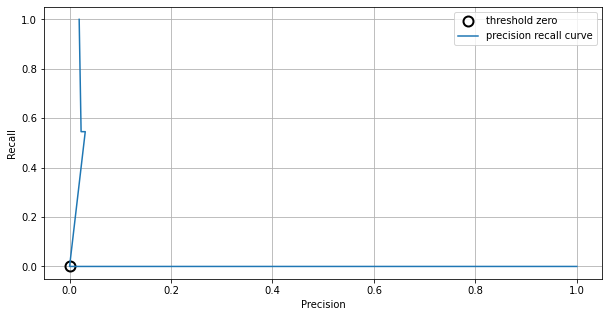

In [364]:
# Recall - Precision Graph
plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_test, grid_tree.predict_proba(X_test)[:, 1])

close_zero = np.argmin(np.abs(thresholds - 0.5))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [365]:
y_predict_test = np.where(grid_tree.predict_proba(X_test) >= thresholds[close_zero], 1, 0)
y_predict_train = np.where(grid_tree.predict_proba(X_train) >= thresholds[close_zero], 1, 0)
print('Before the post processing: ')
print('Precision: ', precision_score(y_train, y_predict_train[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))

Before the post processing: 
Precision:  0.6666666666666666
Recall:  0.0


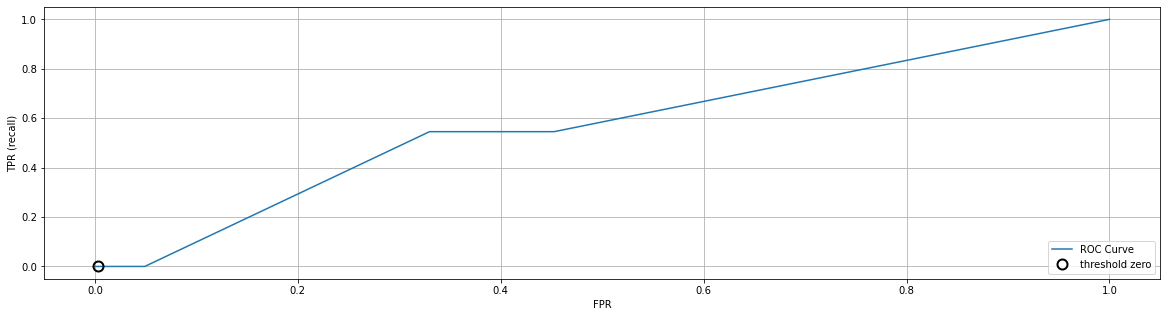

In [366]:
fpr, tpr, thresholds = roc_curve(y_test, grid_tree.predict_proba(X_test)[:,1])

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
i = np.argmin(np.abs(thresholds-0.5))
plt.plot(fpr[i], tpr[i], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [367]:
y_predict_test = np.where(grid_tree.predict_proba(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(grid_tree.predict_proba(X_train) >= thresholds[i], 1, 0)
print('Before the ROC-AUC post processing: ')
print('Precision: ', precision_score(y_test,y_predict_test[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))
print('F1-score: ', f1_score(y_test,y_predict_test[:,1]))
print('ROC Score: ', roc_auc_score(y_test,y_predict_test[:,1]))

Before the ROC-AUC post processing: 
Precision:  0.0
Recall:  0.0
F1-score:  0.0
ROC Score:  0.4982456140350877


**Post Preprocessing**

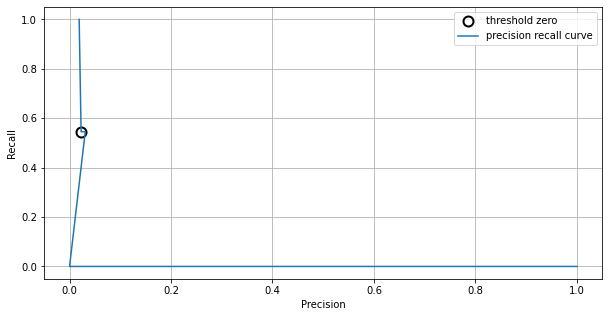

In [369]:
# Recall - Precision Graph
plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_test, grid_tree.predict_proba(X_test)[:, 1])

i = np.argmin(np.abs(recall - 0.4))

plt.plot(precision[i], recall[i], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [370]:
y_predict_test = np.where(grid_tree.predict_proba(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(grid_tree.predict_proba(X_train) >= thresholds[i], 1, 0)
print('After the Precision - Recall post processing: ')
print('Precision: ', precision_score(y_test, y_predict_test[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))

After the Precision - Recall post processing: 
Precision:  0.022727272727272728
Recall:  0.5454545454545454


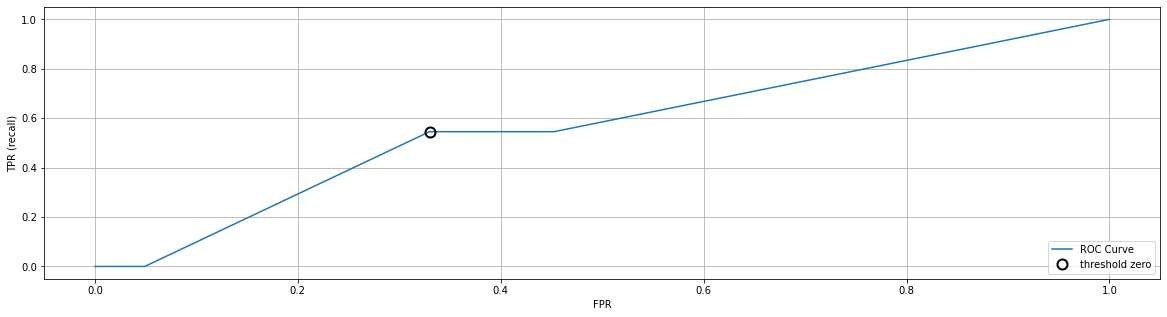

In [371]:
fpr, tpr, thresholds = roc_curve(y_test, grid_tree.predict_proba(X_test)[:,1])

i = np.argmin(np.abs(tpr - 0.58))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.plot(fpr[i], tpr[i], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [372]:
y_predict_test = np.where(grid_tree.predict_proba(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(grid_tree.predict_proba(X_train) >= thresholds[i], 1, 0)
print('After the ROC-AUC post processing: ')
print('Precision: ', precision_score(y_test,y_predict_test[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))
print('F1-score: ', f1_score(y_test,y_predict_test[:,1]))
print('ROC Score: ', roc_auc_score(y_test,y_predict_test[:,1]))

After the ROC-AUC post processing: 
Precision:  0.030927835051546393
Recall:  0.5454545454545454
F1-score:  0.058536585365853655
ROC Score:  0.6078149920255184


## 8) Random Forest Classifier

In [374]:
param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20]}
rf_grid = GridSearchCV(RandomForestClassifier(n_estimators=100, max_features=0.1), param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
rf_grid.fit(X_train, y_train)
max_dep = rf_grid.best_params_
print("Best Hyperparameter for Random Forest Classifier: ", max_dep)
print('Best cross-Validation Score: ', rf_grid.best_score_)

Best Hyperparameter for Random Forest Classifier:  {'max_depth': 3}
Best cross-Validation Score:  0.8006861482134383


In [380]:
y_pred = rf_grid.predict(X_test)
y_pred_train= rf_grid.predict(X_train)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC_AUC Score for Decision Tree:  {:.2f}".format(roc_auc_score(y_test, y_pred)))

0.9810671256454389
[[570   0]
 [ 11   0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       570
           1       0.00      0.00      0.00        11

    accuracy                           0.98       581
   macro avg       0.49      0.50      0.50       581
weighted avg       0.96      0.98      0.97       581

ROC_AUC Score for Decision Tree:  0.50


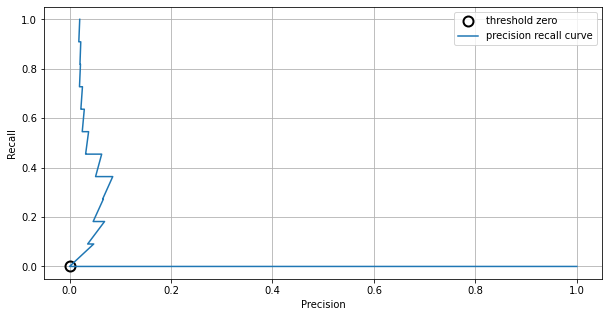

In [375]:
# Recall - Precision Graph
plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_test, rf_grid.predict_proba(X_test)[:, 1])

close_zero = np.argmin(np.abs(thresholds - 0.5))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [376]:
y_predict_test = np.where(rf_grid.predict_proba(X_test) >= thresholds[close_zero], 1, 0)
y_predict_train = np.where(rf_grid.predict_proba(X_train) >= thresholds[close_zero], 1, 0)
print('Before the post processing: ')
print('Precision: ', precision_score(y_test, y_predict_test[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))

Before the post processing: 
Precision:  0.0
Recall:  0.0


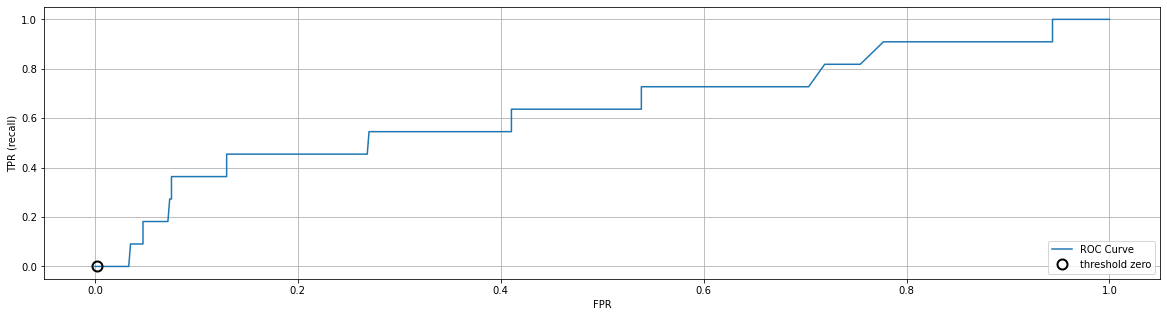

In [377]:
# ROC - AUC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_grid.predict_proba(X_test)[:,1])

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
i = np.argmin(np.abs(thresholds-0.5))
plt.plot(fpr[i], tpr[i], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [378]:
y_predict_test = np.where(rf_grid.predict_proba(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(rf_grid.predict_proba(X_train) >= thresholds[i], 1, 0)
print('Before the ROC-AUC post processing: ')
print('Precision: ', precision_score(y_test,y_predict_test[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))
print('F1-score: ', f1_score(y_test,y_predict_test[:,1]))
print('ROC Score: ', roc_auc_score(y_test,y_predict_test[:,1]))

Before the ROC-AUC post processing: 
Precision:  0.0
Recall:  0.0
F1-score:  0.0
ROC Score:  0.49912280701754386


**Post Preprocessing**

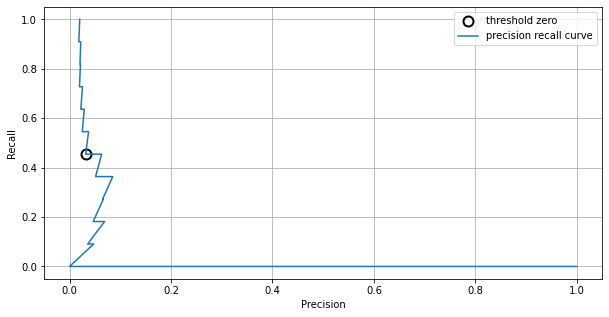

In [387]:
# Recall - Precision Graph
plt.subplots(figsize = (10,5))
precision, recall, thresholds = precision_recall_curve(y_test, rf_grid.predict_proba(X_test)[:, 1])

i = np.argmin(np.abs(recall - 0.44))

plt.plot(precision[i], recall[i], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.grid()

In [388]:
y_predict_test = np.where(rf_grid.predict_proba(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(rf_grid.predict_proba(X_train) >= thresholds[i], 1, 0)
print('After the Precision - Recall post processing: ')
print('Precision: ', precision_score(y_test, y_predict_test[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))

After the Precision - Recall post processing: 
Precision:  0.03164556962025317
Recall:  0.45454545454545453


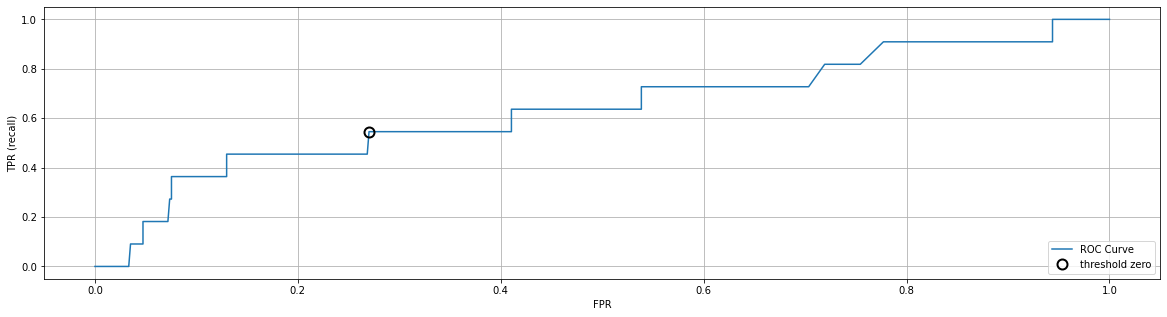

In [389]:
fpr, tpr, thresholds = roc_curve(y_test, rf_grid.predict_proba(X_test)[:,1])

i = np.argmin(np.abs(tpr - 0.58))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.plot(fpr[i], tpr[i], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [390]:
y_predict_test = np.where(rf_grid.predict_proba(X_test) >= thresholds[i], 1, 0)
y_predict_train = np.where(rf_grid.predict_proba(X_train) >= thresholds[i], 1, 0)
print('After the ROC-AUC post processing: ')
print('Precision: ', precision_score(y_test,y_predict_test[:,1]))
print('Recall: ', recall_score(y_test,y_predict_test[:,1]))
print('F1-score: ', f1_score(y_test,y_predict_test[:,1]))
print('ROC Score: ', roc_auc_score(y_test,y_predict_test[:,1]))

After the ROC-AUC post processing: 
Precision:  0.0375
Recall:  0.5454545454545454
F1-score:  0.07017543859649122
ROC Score:  0.6376395534290271


# Best model 
Explain which machine learning model is the best model for this dataset and why? 

After comparing the roc_auc scores of all the above models with paramenter tuning we can see that "Logistic Regression" has the highest ROC_AUC score of 67%. We will be going ahead with this as best model and will be running this model on the test data to make final test predections for the classification problem of this dataset.